In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr 13 04:50:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive

In [5]:
drive.mount("/gdrive")

Mounted at /gdrive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
closedeal = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_closed_deals_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_customers_dataset.csv')
geo = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_geolocation_dataset.csv')
mktlead = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_marketing_qualified_leads_dataset.csv')
orderitem = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_order_items_dataset.csv')
orderpay = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_order_payments_dataset.csv')
orderreview = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_order_reviews_dataset.csv')
orders  = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_orders_dataset.csv')
product = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_products_dataset_translation.csv')
seller = pd.read_csv('/content/drive/MyDrive/archive (5)/olist_sellers_dataset.csv')
category  = pd.read_csv('/content/drive/MyDrive/archive (5)/product_category_name_translation.csv')
revi = pd.read_csv('/content/drive/MyDrive/reviews_en.csv')

In [8]:
mktlead

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


In [9]:
closedeal

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [10]:
cusgeo = pd.merge(customers, orders, on = 'customer_id')
cusgeo = pd.merge(cusgeo, orderitem, on = 'order_id')
cusgeo = pd.merge(cusgeo, orderreview, on = 'order_id')
cusgeo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
112368,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05
112369,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07
112370,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,0bcdc9e450ea500811a8d39ee993cd47,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18


In [11]:
cusa = pd.merge(mktlead, closedeal, on = 'mql_id')
cusa = pd.merge(cusa, orderitem, on = 'seller_id')
cusa = pd.merge(cusa, orderreview, on = 'order_id')
cusa = pd.merge(cusa, orders, on = 'order_id')

cusa

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,Gostei muito! Logo vou adquir o de maiorr volu...,2018-06-27 00:00:00,2018-06-30 17:14:07,27a878219114302047d41366ffeeba1e,delivered,2018-06-20 21:40:18,2018-06-20 22:20:21,2018-06-22 15:23:00,2018-06-26 20:06:25,2018-07-17 00:00:00
1,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,Recebi o produto errado.\r\nComprei um Soprado...,2018-07-28 00:00:00,2018-07-28 23:33:39,14c1e4101ca2dc7dbf876d9c9e6b11a6,delivered,2018-07-23 20:50:50,2018-07-24 10:31:11,2018-07-25 15:09:00,2018-07-27 18:27:42,2018-08-07 00:00:00
2,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,2018-06-26 00:00:00,2018-06-28 19:55:07,bcd15e6f5399f2899de4482cf6783dae,delivered,2018-06-21 15:42:55,2018-06-21 16:00:04,2018-06-22 15:23:00,2018-06-25 14:28:27,2018-07-13 00:00:00
3,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,NaN,2018-08-04 00:00:00,2018-08-07 17:36:18,5c232e92346113f68998cf6395eb457f,delivered,2018-07-24 17:25:33,2018-07-24 17:35:18,2018-07-31 14:18:00,2018-08-03 18:41:28,2018-08-17 00:00:00
4,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,Coloquei que não foi entregue por que eu que t...,2018-08-26 00:00:00,2018-09-01 15:23:03,161045ee99ad91883dbc1a6d26127785,delivered,2018-08-14 11:44:44,2018-08-15 22:44:03,2018-08-20 13:31:00,2018-08-25 15:15:32,2018-08-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,NaN,2018-08-11 00:00:00,2018-08-12 04:58:47,70972230081174ffa0f073a7fa56d95e,delivered,2018-08-08 19:46:37,2018-08-08 20:04:53,2018-08-09 15:15:00,2018-08-10 20:48:30,2018-08-17 00:00:00
5017,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,Entrega rápida...,2018-08-02 00:00:00,2018-08-03 01:21:23,78e5e5a5de6f4de446c8eb4509755a13,delivered,2018-07-25 08:15:09,2018-07-25 08:25:14,2018-07-26 13:44:00,2018-08-01 20:35:40,2018-08-15 00:00:00
5018,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,Só nao entendi porque a caixa veio aberta. Mai...,2018-07-28 00:00:00,2018-07-30 16:20:50,6c435ed0cfd0b31d333015f5a2cdb2d5,delivered,2018-07-17 18:27:15,2018-07-19 02:42:34,2018-07-20 13:20:00,2018-07

In [12]:
cusa2 = pd.merge(customers, orders, on = 'customer_id')
cusa2 = pd.merge(cusa2, orderitem, on = 'order_id')
cusa2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [13]:
cusa.to_csv('customeranalysis.csv')

In [14]:
organicsearch = cusa[cusa['origin'] == 'organic_search']
paidsearch = cusa[cusa['origin'] == 'paid_search']
social = cusa[cusa['origin'] == 'social']



In [15]:
orderreview.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

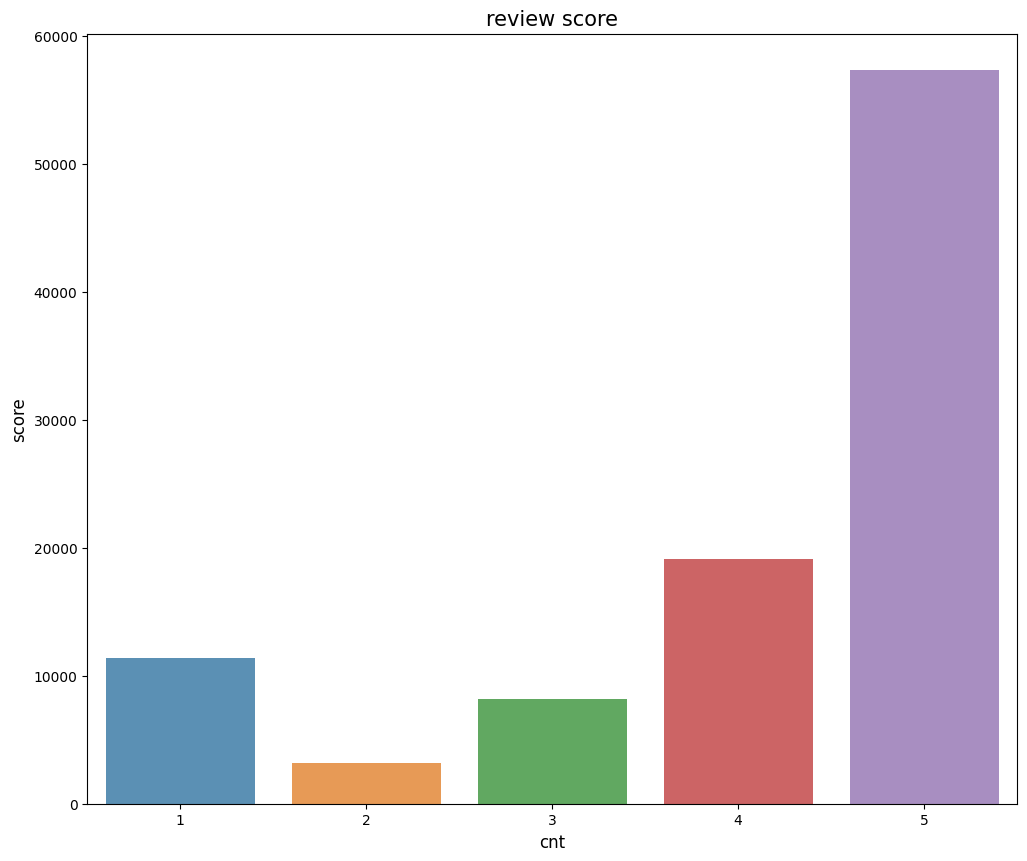

In [16]:
re = orderreview.review_score.value_counts()
plt.figure(figsize = (12,10))
sns.barplot(y = re.values, x = re.index, alpha = 0.8)
plt.ylabel('score', fontsize = 12)
plt.xlabel('cnt', fontsize = 12)
plt.title('review score', fontsize = 15)
plt.show()

In [17]:
review1 = orderreview[orderreview['review_score'] == 1]
review2 = orderreview[orderreview['review_score'] == 2]

In [18]:
review111 = review1.review_comment_message.dropna(axis = 0)
review111

19                                                 Péssimo
29                     Não gostei ! Comprei gato por lebre
32       Sempre compro pela Internet e a entrega ocorre...
39                            Nada de chegar o meu pedido.
51       recebi somente 1 controle Midea Split ESTILO.\...
                               ...                        
99094    Gostaria de saber porque meu produto ainda não...
99141    Ate hoje dia 21/10/2017 o pedido não foi entre...
99155    Eu recebi o seguinte email e preciso saber com...
99169    Boa tarde. \r\nNão recebo todos os produtos fa...
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 8745, dtype: object

In [19]:
review11 = review1[review1['review_comment_message'].str.contains('entrega', na = False, case = False)]
review11

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
169,185cb85ede91009d7a8e685687c037ee,2e5dc86c8c4aa663549caf5e31de840d,1,NaN,fiz minha compra faz 30 dias e não recebi aind...,2017-04-06 00:00:00,2017-04-09 18:25:12
239,a36150969fe6bd09ed011dd78aeb0189,ef1b29b591d31d57c0d7337460dd83c9,1,NaN,"Demora na entrega, detestei o atendimento e NU...",2016-11-02 00:00:00,2016-11-03 12:04:24
248,b736ff4204044e49e39062584d06fa74,993da8482e658ec7f1d0c6d955604936,1,NaN,A loja anuncia um produto e entrega outro.,2018-08-24 00:00:00,2018-08-27 05:20:47
276,f7eb8792e67d53e01a224bfa9b6802b2,a0f2f8b0523207a13f02225bc812ed23,1,Horrível,Cancelaram a minha compra um dia antes da entr...,2018-08-05 00:00:00,2018-08-05 09:27:55
...,...,...,...,...,...,...,...
98848,676ec543b8a320e7351ab2fd0907b30b,a4bc6ee8a0b10b9362660438b786cdaf,1,NaN,"Ainda não recebi o produto como vou avaliar, a...",2018-04-14 00:00:00,2018-04-15 01:47:15
98863,cd5eb3f8c8faeb7a89b1e8b3120fe206,0f8ea8bf70adb55dcc5f8501984138ca,1,NaN,Faltou um pedido na entrega e quando pede para...,2018-02-15 00:00:00,2018-02-22 22:41:51
99042,71fd2bd9edec8a1cd368a5fa173979d6,4a5cf649e3eb500fc079aace5f03583e,1,NaN,Não cumpriu o prazo.. Não teve capacidade para...,2018-03-30 00:00:00,2018-03-30 21:52:35
99060,e422ff70b7960c6d7d4809174fca3e54,48d02bf6678d19dcb9ef11720a946dfc,1,NaN,Esperava que eles cumprisse o prazo da entrega,2017-12-17 00:00:00,2017-12-17 09:17:32


In [20]:
review22 = review2[review2['review_comment_message'].str.contains('entrega', na = False, case = False)]
review22

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
128,5c37d7ba6ef2f031c34bb4fda3454018,bbd1b9ebbc5a09d51caaa2d10e0f93b5,2,NaN,Demorou de mais pra entrega,2017-12-17 00:00:00,2017-12-17 12:14:13
262,b3df5ccdfff218d039dd166e3da759f5,33fb6b947580ee29bd0c6babed6049c1,2,NaN,Foi marcado o dia 14/02 para entrega do pedido...,2018-03-01 00:00:00,2018-03-04 21:45:00
558,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
945,ef53057f3251e89611bcbc665e575765,55dfff244bc5d5f81d58d4148062c9b6,2,NaN,"Tive problema na entrega, pois não tinha ningu...",2017-06-10 00:00:00,2017-06-10 15:31:38
1061,b5be606d37fe1a0bd2bbcb7e550574a2,cfa438aab28ed50c386312e0e475dd82,2,NaN,Recebi a encomenda de forma normal e dentro do...,2017-07-11 00:00:00,2017-07-11 23:10:43
...,...,...,...,...,...,...,...
98420,880814050d03f00b83374055274a3f9d,1e0f40bbfe787796d0c56e3795dc94d8,2,Relogio de pulso,Prazo de 3 dias úteis para entrega. Foi Compra...,2018-08-11 00:00:00,2018-08-11 19:41:17
98492,dc7ff228430317daa558734a4af3527d,d812dbfcae5778a9864fae0dfe22d9c9,2,Atraso na entrega do prod,O prazo para entrega era dia 14/05 e até agora...,2018-05-16 00:00:00,2018-05-16 16:54:47
98647,18215615f60e6771c00faaaa1ade4cea,743277e5089af7df0cbd543c93e5d852,2,Compra,Um demora pra entrega,2018-07-14 00:00:00,2018-07-15 01:46:30
99011,4baf65ba0f4dc753e9cf3d8863433da0,9e659002324793f036fbe26aa8b5d049,2,NaN,"Falta de consideração com o cliente, pois ocor...",2018-02-23 00:00:00,2018-02-25 16:49:07


In [21]:
review1111 = review1[review1['review_comment_message'].str.contains('entregue', na = False, case = False)]
review1111

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
115,ae728c1061bf163b4bd256ad9ee0bb83,45c780334bc32cb77559a65c5f171160,1,NaN,Este foi o pedido\r\nBalde Com 128 Peças - Blo...,2018-01-04 00:00:00,2018-01-10 09:52:57
168,d7ea05bb4f9c77d606fd90b1a27e317d,bb5b0d8f3e9c964760c674f2aa2ae0cf,1,NaN,Comprei o produto dia 25 de fevereiro e hoje d...,2018-03-29 00:00:00,2018-03-29 23:13:58
197,06f47dacd0575e592bf6a17e922ce6cd,82348f1b5f24ac795fa9320e02c49553,1,não recebi ainda,aqui está descrevendo como entregue só que ate...,2018-06-28 00:00:00,2018-06-29 16:34:46
259,c239d18d7e310e477d5e7b76b362db1d,80a2b0dcabefef6a83477204433b2482,1,NaN,produto foi entregue com umas das alças com pr...,2018-03-11 00:00:00,2018-03-13 21:17:09
381,bfd1c687738141ef5861a1a1269ca855,409e065598ea4a9dba359d894ab0cab9,1,NaN,"Dos dois produtos comprados, foi entregue apen...",2018-01-10 00:00:00,2018-01-11 11:54:28
...,...,...,...,...,...,...,...
99055,5dcc936952f7e67f7faa64c8f57e97a9,719a2a4825d52ce82cbc8698a71495ba,1,produto não entregue,"o produto não foi entregue, a empresa não se p...",2018-05-24 00:00:00,2018-05-26 05:11:57
99071,033790236c8e168eb38e5268d82b11cc,e72618bee51ae5e11af9d42ce16be85d,1,NaN,meu produto não foi entregue ainda ..,2017-09-03 00:00:00,2017-09-04 18:59:51
99081,dfb01be03c8f304bb01e3d2d90719a5b,c5d41b216e4b42500c5da2be17a74065,1,NaN,"Meus pedidos estão dando como entregues , mais...",2018-05-29 00:00:00,2018-05-31 13:35:06
99086,7b85c6acaddb354af9aa840528838d9f,33a3edb84b9df4cb49546859b990ac6d,1,Empres não confiável,Minha opinião é que se comprei o produto ele t...,2018-03-21 00:00:00,2018-10-11 13:34:54


In [22]:
review2222 = review2[review2['review_comment_message'].str.contains('entregue', na = False, case = False)]
review2222

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
262,b3df5ccdfff218d039dd166e3da759f5,33fb6b947580ee29bd0c6babed6049c1,2,NaN,Foi marcado o dia 14/02 para entrega do pedido...,2018-03-01 00:00:00,2018-03-04 21:45:00
558,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
652,a099d25e117c98a5d7ae5b70119b7f32,e9e76f41dadb7c83d5f8dcbd2ca7473a,2,NaN,Dentro do prazo porém poderiam agilizar como n...,2017-07-29 00:00:00,2017-08-02 18:29:53
818,d8d62030afbc777000b61bdfc7312939,14a05c02d483800864e5c19a3a7f0ee2,2,Entrega de encomenda,Penso que deveria haver um modo de se comunica...,2018-08-31 00:00:00,2018-08-31 10:22:05
1262,ed19d7f5da6c2c6d4d79f4ec2425f63f,02f751c4c2fc8ca376b65c8847b65f4d,2,NaN,produto entregue totalmente diferente do comprado,2018-06-21 00:00:00,2018-06-25 17:44:56
...,...,...,...,...,...,...,...
96897,6957c0682302622ce8737c0a33151d4c,0a4c05d2e1ae812a342af2f5c9a34b36,2,regulart,era para ser entregue 4 produtos tres e depois...,2018-08-04 00:00:00,2018-08-04 20:01:17
97355,77b557a91d7a44f5711b8b99977415ce,0ef9e877644c6bc7049bbd78f6e2846b,2,Demora na entrega,até o momento não foi entregue o byeblade kit ...,2018-05-25 00:00:00,2018-06-14 23:53:23
97705,e8b0e8aa4aa6bc43fc936579da18787c,bfce66de4bbac659ab1d0763b8796a58,2,NaN,Fiz um pedido de 2 cortinas iguais e só recebi...,2017-07-18 00:00:00,2017-07-21 14:37:53
98420,880814050d03f00b83374055274a3f9d,1e0f40bbfe787796d0c56e3795dc94d8,2,Relogio de pulso,Prazo de 3 dias úteis para entrega. Foi Compra...,2018-08-11 00:00:00,2018-08-11 19:41:17


In [23]:
review111111 = review1[review1['review_comment_message'].str.contains('Produto', na = False, case = False)]
review111111 = review111111[~review111111['review_comment_message'].str.contains('entrega', na=False, case=False)]
review111111 = review111111[~review111111['review_comment_message'].str.contains('entregue', na=False, case=False)]
review111111 = review111111[~review111111['review_comment_message'].str.contains('não recebi', na=False, case=False)]
review111111 = review111111[~review111111['review_comment_message'].str.contains('recebi', na=False, case=False)]
review111111 = review111111[~review111111['review_comment_message'].str.contains('aguardando', na=False, case=False)]
review111111 = review111111[~review111111['review_comment_message'].str.contains('chegou', na=False, case=False)]
review111111

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
76,60c714ed14cef913944a3147094a4742,9ac05114800f02bfaa783bd76842dbe2,1,NaN,"Produto muito inferior, mal acabado.",2018-07-03 00:00:00,2018-07-05 19:03:52
242,8b4c14417bccab81710772ecb8b23fd6,62a575a2a9f2c005b7ec7ff7dd76d5ee,1,NaN,produto deu defeito na 1 vez de uso.,2018-08-03 00:00:00,2018-08-04 19:32:39
296,f55ac350831de6694d569e9c0176dacd,92cd4be4e992be4ab03304531ce6c5f9,1,NaN,E muito desordenado comprei três produtos mais...,2018-01-31 00:00:00,2018-02-01 02:12:01
320,3db041dd46e9935752c691a2093799c2,51eaae3287e04efba45a51f52098fc88,1,NaN,Produto não recomendo não ler em nenhum dispos...,2018-04-27 00:00:00,2018-04-28 01:49:40
330,f3f77d01a24ce4da52b6f7e83e71498d,a5a83c95ed669b7ba0ddce1d761c191f,1,NaN,Tentando cancelar o produto desde antes da emi...,2018-03-01 00:00:00,2018-03-02 12:55:24
...,...,...,...,...,...,...,...
98956,44380245bf1a49875542ea0e7f216986,98efe48952662e6a45a1dc51770039d2,1,não recebi o produto aind,assim que receber produto eu avalio positivo,2018-06-26 00:00:00,2018-06-28 19:06:42
98987,ae766d965b50c4a0e1bbae31b9b5aa2b,7f4419f7c94db80e542d82717e3c6528,1,NaN,"Faz um mês que comprei o livro, já paguei e at...",2018-03-24 00:00:00,2018-03-24 05:14:40
99066,bde3a6bc851b615b1b91add03433f656,226975521c585d7bb98996f83ccdde59,1,NaN,Comprei o produto com a data de validade ate 2...,2017-07-06 00:00:00,2017-07-07 13:10:45
99091,fade356e7332606aa22776d8d553cdce,837b75362f8a7c08c85182dfd16cb72d,1,NaN,Ainda nao recevi o produto.,2018-08-12 00:00:00,2018-08-12 13:51:31


In [24]:
cg1 = cusgeo[~cusgeo['review_comment_message'].str.contains('Produto', na = False, case = False)]
cg1 = cg1[~cg1['review_comment_message'].str.contains('entrega', na=False, case=False)]
cg1 = cg1[~cg1['review_comment_message'].str.contains('entregue', na=False, case=False)]
cg1 = cg1[~cg1['review_comment_message'].str.contains('não recebi', na=False, case=False)]
cg1 = cg1[~cg1['review_comment_message'].str.contains('recebi', na=False, case=False)]
cg1 = cg1[~cg1['review_comment_message'].str.contains('aguardando', na=False, case=False)]
cg1 = cg1[~cg1['review_comment_message'].str.contains('chegou', na=False, case=False)]
cg1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112365,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP,97d6c1727b0d36b8d04035e35d86f40f,delivered,2018-05-18 21:42:33,2018-05-18 21:55:14,2018-06-04 16:03:00,...,2eb70248d66e0e3ef83659f71b244378,2018-05-29 21:55:14,124.90,7.74,e81d6dcde39af2750b30cc558d008dac,4,NaN,NaN,2018-06-06 00:00:00,2018-06-07 14:09:19
112367,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
112368,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05
112369,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07


In [25]:
cgr1 = cg1[cg1['review_score'] == 1]
cgr1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
56,8247b5583327ab8be19f96e1fb82f77b,d85547cd859833520b311b4458a14c1c,23970,parati,RJ,a6917b5d71e0e9bc434e9228db8daeb2,delivered,2017-06-09 15:46:17,2017-06-10 15:42:38,2017-06-12 17:10:55,...,7e93a43ef30c4f03f38b393420bc753a,2017-06-15 15:42:38,788.42,21.28,e4d4b6477ff4777b725e5d5682fa785d,1,NaN,Me mandaram um o relógio que não funciona.. Vo...,2017-06-22 00:00:00,2017-06-23 00:32:44
66,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE,4f0695330f3816ef294bf1f4b18f4f2e,delivered,2018-03-29 21:28:04,2018-03-29 21:35:20,2018-04-12 23:36:29,...,06a2c3af7b3aee5d69171b0e14f0ee87,2018-04-04 21:35:20,61.99,15.31,d90d6003d35e50529615ad62c8fb3b81,1,NaN,NaN,2018-04-25 00:00:00,2018-04-25 04:24:43
69,de4e13fd7d6469c5ada77d0843c55e42,0c17f9ac28cbd7323f0f4043e9db5907,96015,pelotas,RS,e04d4af0a4a1090bf68ccfee2dd809ef,delivered,2018-05-08 22:55:20,2018-05-08 23:11:59,2018-05-10 18:29:00,...,7d13fca15225358621be4086e1eb0964,2018-05-14 23:11:59,118.00,10.48,bf240ba5e4891f67010805f0b9ffd9b5,1,produto errado,"venho outro modelo de relógio casio, diferente...",2018-05-25 00:00:00,2018-05-27 21:24:32
82,b514422efcf14bef34858a0829bef189,b436a108536c1dabbc1d3e808d782df9,24431,sao goncalo,RJ,6c241acf57ed5ad34e75d73e49f80f0e,delivered,2017-12-28 04:31:58,2017-12-28 04:47:24,2017-12-28 17:59:29,...,4c2b230173bb36f9b240f2b8ac11786e,2018-01-04 04:47:24,14.90,14.10,d169e9d597d9dcfc89f83e07ce710326,1,NaN,NaN,2018-01-24 00:00:00,2018-01-25 02:00:17
110,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,...,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,18a80894de129917815e652bde9bf45a,1,NaN,Fiz a compra e não entregou em minha casa. Fiz...,2017-09-13 00:00:00,2017-09-13 12:44:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112346,b7c889215de76857c7967c1011125d2d,522e244a96d13876c5bac4985a8d5075,82410,curitiba,PR,1a9543c90f188e2e4fb14327ad4a9c9b,delivered,2018-01-30 15:28:21,2018-01-31 15:30:30,2018-02-16 16:28:33,...,7c67e1448b00f6e969d365cea6b010ab,2018-02-14 15:30:30,79.99,30.40,8fc74bf8b221b8c88a629942d4a670a7,1,NaN,- a compra foi efetuada em 30/01\r\n- a emissã...,2018-03-16 00:00:00,2018-03-16 12:32:19
112347,b7c889215de76857c7967c1011125d2d,522e244a96d13876c5bac4985a8d5075,82410,curitiba,PR,1a9543c90f188e2e4fb14327ad4a9c9b,delivered,2018-01-30 15:28:21,2018-01-31 15:30:30,2018-02-16 16:28:33,...,7c67e1448b00f6e969d365cea6b010ab,2018-02-14 15:30:30,79.99,30.40,8fc74bf8b221b8c88a629942d4a670a7,1,NaN,- a compra foi efetuada em 30/01\r\n- a emissã...,2018-03-16 00:00:00,2018-03-16 12:32:19
112355,e5ed7280cd1a3ac2ba29fd6650d8867c,206e64e8af2633a2ebe158a7fcb860db,8560,poa,SP,53cbf33b674d602f6746cb90a9d874fd,delivered,2017-05-15 17:42:38,2017-05-16 03:25:20,2017-05-16 16:02:08,...,4a3ca9315b744ce9f8e9374361493884,2017-05-23 03:25:20,89.90,12.13,36149d709e45fc944a2ce1ad688d6003,1,NaN,NaN,2017-05-23 00:00:00,2017-05-23 12:27:17
112360,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,51a04a8a6bdcb23deccc82b0b80742cf,2017-11-24 12:15:25,167.99,31.93,603f2873842a6975a43c54d305397d69,1,NaN,NaN,2017-12-14 00:00:00,2017-12-16 13:50:11


In [26]:
cgr2 = cg1[cg1['review_score'] == 2]
cgr2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
29,e0eea8f69a457b3f1fa246e44c9ebefd,4d221875624017bc47b4d1ce7314a5b7,29311,cachoeiro de itapemirim,ES,3a6d41a4fe7a8e841b7c8e4b77d4e301,delivered,2017-11-24 11:29:52,2017-11-24 13:33:05,2017-11-27 21:12:51,...,cc419e0650a3c5ba77189a1882b7556a,2017-12-01 13:31:24,53.99,15.13,b3f4af6edd7bf95b9acdb79729d3b005,2,NaN,NaN,2017-12-07 00:00:00,2017-12-12 15:09:52
53,79de53946db384e2d7a9bd131792ad17,7ce5b57a120a2da6a804afa58ffcbfb5,39406,montes claros,MG,b95cae4001dc3efdaa739478cf9c92e4,delivered,2018-05-22 01:43:18,2018-05-23 02:38:41,2018-05-25 13:47:00,...,1025f0e2d44d7041d6cf58b6550e0bfa,2018-05-28 02:38:41,196.80,29.92,3c58af2d366f0c4aeee1d4273b12d9f4,2,NaN,O lustre veio sem as lâmpadas,2018-06-04 00:00:00,2018-06-04 20:21:18
106,23e96758fd640560e9b1fbcda90abfc4,9e1f719fe5b17b9c51905fee6d6385c1,5565,sao paulo,SP,fb9a9bc9654c16364f348fb2309b1214,delivered,2018-04-02 08:54:48,2018-04-02 09:09:07,2018-04-11 22:08:39,...,b19f3ca2ea475913750f25a5c37c8d8f,2018-04-06 09:09:07,199.99,67.77,402dd81c9c7d5c5913e84daa2599a20c,2,NaN,"Bonita, pratica, porém a tampa da churrasqueir...",2018-04-21 00:00:00,2018-04-23 10:14:54
113,126cf4e9fd189d2d64bc9b112fd6a5e8,90d479448b39ad9586d05da64cfb695b,62016,sobral,CE,af3fae91bafed6357991c4a3be0125d4,delivered,2017-03-28 11:16:48,2017-03-28 11:30:17,2017-03-30 11:22:43,...,e24fc9fcd865784fb25705606fe3dfe7,2017-04-03 11:30:17,138.00,25.46,b581416c19c837962246552359f82dd3,2,NaN,NaN,2017-05-05 00:00:00,2017-05-05 15:23:13
138,3ccb27f9c7ee205656acef98c19fc061,f32cdbbeca0aba5358bddc018dd12b09,91340,porto alegre,RS,a8c3124b7f912401d702018ae0c02b05,delivered,2018-04-16 20:46:53,2018-04-16 23:12:05,2018-05-08 14:04:00,...,2eb70248d66e0e3ef83659f71b244378,2018-04-29 23:12:05,149.90,15.93,707b741578dcb1ad4d976821a9a1e892,2,NaN,NaN,2018-05-17 00:00:00,2018-05-17 21:15:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111654,28fa7dc03ec522bf4b643bf5b3f67134,1cec9791df8f2c24491b0d9a50ab7228,16920,castilho,SP,4f737bc2a795169102fc6d5b5aa31e27,delivered,2018-08-20 14:13:58,2018-08-20 16:30:08,2018-08-21 12:03:00,...,6560211a19b47992c3666cc44a7e94c0,2018-08-22 16:30:08,99.00,13.35,c42b41da110a959e52e3f0cbb564f26a,2,NaN,NaN,2018-08-25 00:00:00,2018-08-28 03:27:34
111762,fe67d071eefb7f48949cbe89515cd672,6a140ba4cf08e0d893b81b5ec7264d86,99500,carazinho,RS,ffbcdac3da2c2f23b699666818b0d38c,delivered,2018-06-19 18:38:34,2018-06-19 18:56:49,2018-06-20 10:46:00,...,6560211a19b47992c3666cc44a7e94c0,2018-06-21 18:56:49,78.00,18.65,3399962f94ed54b5eec3a236f35274e4,2,Produto duvidoso,Nunca havia adquirido um relógio da Diesel. Lo...,2018-06-29 00:00:00,2018-06-30 11:17:50
111927,48c3e8e784086fd4b26b9929625373d6,1abc36c4380241b8d24c8191195fdcd7,32187,contagem,MG,19c1376b2449385d598bc89c73cdf380,delivered,2017-09-13 23:09:04,2017-09-13 23:24:25,2017-09-14 21:47:48,...,6560211a19b47992c3666cc44a7e94c0,2017-09-19 23:24:25,29.00,14.10,9c9a4e77cf5bc47ba586307bf158d285,2,NaN,Produdo muito fragil e superficial.\r\nparece ...,2017-09-22 00:00:00,2017-09-23 22:34:36
111960,1612f32963e9825da1018976d1c9e8fc,0e2cdea5b5c9dc617ad5a66dea978812,40375,salvador,BA,ec38e40a750810e337a528576f0090e7,delivered,2017-09-10 17:36:43,2017-09-10 17:50:36,2017-09-11 21:25:38,...,004c9cd9d87a3c30c522c48c4fc07416,2017-09-18 17:50:36,82.99,19.82,f510b7429860d30219d7af0b684d8c36,2,NaN,NaN,2017-10-07 00:00:00,2017-10-09 09:13:45


In [27]:
cgr = pd.concat([cgr1, cgr2], ignore_index=True)
cgr

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,8247b5583327ab8be19f96e1fb82f77b,d85547cd859833520b311b4458a14c1c,23970,parati,RJ,a6917b5d71e0e9bc434e9228db8daeb2,delivered,2017-06-09 15:46:17,2017-06-10 15:42:38,2017-06-12 17:10:55,...,7e93a43ef30c4f03f38b393420bc753a,2017-06-15 15:42:38,788.42,21.28,e4d4b6477ff4777b725e5d5682fa785d,1,NaN,Me mandaram um o relógio que não funciona.. Vo...,2017-06-22 00:00:00,2017-06-23 00:32:44
1,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE,4f0695330f3816ef294bf1f4b18f4f2e,delivered,2018-03-29 21:28:04,2018-03-29 21:35:20,2018-04-12 23:36:29,...,06a2c3af7b3aee5d69171b0e14f0ee87,2018-04-04 21:35:20,61.99,15.31,d90d6003d35e50529615ad62c8fb3b81,1,NaN,NaN,2018-04-25 00:00:00,2018-04-25 04:24:43
2,de4e13fd7d6469c5ada77d0843c55e42,0c17f9ac28cbd7323f0f4043e9db5907,96015,pelotas,RS,e04d4af0a4a1090bf68ccfee2dd809ef,delivered,2018-05-08 22:55:20,2018-05-08 23:11:59,2018-05-10 18:29:00,...,7d13fca15225358621be4086e1eb0964,2018-05-14 23:11:59,118.00,10.48,bf240ba5e4891f67010805f0b9ffd9b5,1,produto errado,"venho outro modelo de relógio casio, diferente...",2018-05-25 00:00:00,2018-05-27 21:24:32
3,b514422efcf14bef34858a0829bef189,b436a108536c1dabbc1d3e808d782df9,24431,sao goncalo,RJ,6c241acf57ed5ad34e75d73e49f80f0e,delivered,2017-12-28 04:31:58,2017-12-28 04:47:24,2017-12-28 17:59:29,...,4c2b230173bb36f9b240f2b8ac11786e,2018-01-04 04:47:24,14.90,14.10,d169e9d597d9dcfc89f83e07ce710326,1,NaN,NaN,2018-01-24 00:00:00,2018-01-25 02:00:17
4,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,...,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,18a80894de129917815e652bde9bf45a,1,NaN,Fiz a compra e não entregou em minha casa. Fiz...,2017-09-13 00:00:00,2017-09-13 12:44:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,28fa7dc03ec522bf4b643bf5b3f67134,1cec9791df8f2c24491b0d9a50ab7228,16920,castilho,SP,4f737bc2a795169102fc6d5b5aa31e27,delivered,2018-08-20 14:13:58,2018-08-20 16:30:08,2018-08-21 12:03:00,...,6560211a19b47992c3666cc44a7e94c0,2018-08-22 16:30:08,99.00,13.35,c42b41da110a959e52e3f0cbb564f26a,2,NaN,NaN,2018-08-25 00:00:00,2018-08-28 03:27:34
7156,fe67d071eefb7f48949cbe89515cd672,6a140ba4cf08e0d893b81b5ec7264d86,99500,carazinho,RS,ffbcdac3da2c2f23b699666818b0d38c,delivered,2018-06-19 18:38:34,2018-06-19 18:56:49,2018-06-20 10:46:00,...,6560211a19b47992c3666cc44a7e94c0,2018-06-21 18:56:49,78.00,18.65,3399962f94ed54b5eec3a236f35274e4,2,Produto duvidoso,Nunca havia adquirido um relógio da Diesel. Lo...,2018-06-29 00:00:00,2018-06-30 11:17:50
7157,48c3e8e784086fd4b26b9929625373d6,1abc36c4380241b8d24c8191195fdcd7,32187,contagem,MG,19c1376b2449385d598bc89c73cdf380,delivered,2017-09-13 23:09:04,2017-09-13 23:24:25,2017-09-14 21:47:48,...,6560211a19b47992c3666cc44a7e94c0,2017-09-19 23:24:25,29.00,14.10,9c9a4e77cf5bc47ba586307bf158d285,2,NaN,Produdo muito fragil e superficial.\r\nparece ...,2017-09-22 00:00:00,2017-09-23 22:34:36
7158,1612f32963e9825da1018976d1c9e8fc,0e2cdea5b5c9dc617ad5a66dea978812,40375,salvador,BA,ec38e40a750810e337a528576f0090e7,delivered,2017-09-10 17:36:43,2017-09-10 17:50:36,2017-09-11 21:25:38,...,004c9cd9d87a3c30c522c48c4fc07416,2017-09-18 17:50:36,82.99,19.82,f510b7429860d30219d7af0b684d8c36,2,NaN,NaN,2017-10-07 00:00:00,2017-10-09 09:13:45


In [28]:
cgr.to_csv('cgr.csv')

In [29]:
review222222 = review2[review2['review_comment_message'].str.contains('Produto', na = False, case = False)]
review222222 = review2[~review2['review_comment_message'].str.contains('entrega', na=False, case=False)]
review222222 = review222222[~review222222['review_comment_message'].str.contains('entregue', na=False, case=False)]
review222222 = review222222[~review222222['review_comment_message'].str.contains('não recebi', na=False, case=False)]
review222222 = review222222[~review222222['review_comment_message'].str.contains('recebi', na=False, case=False)]
review222222 = review222222[~review222222['review_comment_message'].str.contains('aguardando', na=False, case=False)]
review222222 = review222222[~review222222['review_comment_message'].str.contains('chegou', na=False, case=False)]
review00 = review222222[~review222222['review_comment_message'].str.contains('chegou', na=False, case=False)]
review00

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
40,ab3056e4fb5a36df4b58c1746e4a6b8f,aad1dcbe4c9fe2e3486e5e04c6649097,2,NaN,NaN,2018-05-13 00:00:00,2018-05-14 16:29:15
94,4d36f8266245b00faebc520e9cd963c0,b1cc044d321053348a5e482ca7e6b2e3,2,NaN,NaN,2018-03-17 00:00:00,2018-03-17 09:29:47
156,0f47555e4df6f6e31bb40c6ff7fb6fac,f81ed3e1a19bd4246ee3e90b01359eb0,2,NaN,NaN,2017-10-02 00:00:00,2017-10-04 23:54:09
261,5cc663b86b8e633c513546914eca82d4,1e9ea7d5f669d780b187f487a03c3f7b,2,NaN,NaN,2017-11-24 00:00:00,2017-11-27 12:46:34
263,c11da18223114c483b887b9914045f79,468c2f34312a6d270a20c7aef082041c,2,NaN,LOJA ALÉM DO FRETE SER MUITO CARO . O PRODUTO ...,2017-06-07 00:00:00,2017-06-09 06:12:39
...,...,...,...,...,...,...,...
98967,2cb679cfffd69784ae97b7f48293f6bd,0245631f7bd55dbee7c6b441629bba94,2,NaN,Essa cortina não veio com as demais:Cortina Vo...,2017-10-14 00:00:00,2017-10-15 20:03:59
99010,b988d4475d2c71665ddbd403eab29648,e5719cfaa683987b3ac4bdcc0c5c6a46,2,NaN,NaN,2017-05-27 00:00:00,2017-05-29 12:18:23
99139,cadeddfc924c941517913adcc05dcb26,5f0729d8bd88589e8501140a9eb86ed3,2,NaN,"nao satifez minhas expectativas, não funciona ...",2018-02-03 00:00:00,2018-02-06 11:52:01
99174,cf0b8c06ba024a8a8d3f2ac51fcd99f4,fff2cdc825f9fc0ba3c04227cfa02303,2,NaN,NaN,2018-03-09 00:00:00,2018-04-23 17:52:49


In [30]:
review11111111 = review1[review1['review_comment_message'].str.contains('não recebi', na = False, case = False)]
review11111111

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
149,ef8ae544c432bb1053ba5990bd0d6227,e18ebd6286697a3f0f6fe267d8286cb2,1,NaN,EU NÃO RECEBI O PRODUTO E CONSTA NO SISTEMA QU...,2018-01-12 00:00:00,2018-01-13 00:28:49
169,185cb85ede91009d7a8e685687c037ee,2e5dc86c8c4aa663549caf5e31de840d,1,NaN,fiz minha compra faz 30 dias e não recebi aind...,2017-04-06 00:00:00,2017-04-09 18:25:12
197,06f47dacd0575e592bf6a17e922ce6cd,82348f1b5f24ac795fa9320e02c49553,1,não recebi ainda,aqui está descrevendo como entregue só que ate...,2018-06-28 00:00:00,2018-06-29 16:34:46
245,252b934455d29ca8cc070504686ecc52,4806c15e687faabdb46ca2643cfcfa6e,1,NaN,até agora não recebi o produto.,2018-03-14 00:00:00,2018-03-14 08:59:57
...,...,...,...,...,...,...,...
98866,cb57684d699f3678723ea12f03cd881c,8cacf6d8c088e18ca96ee6d5a138461b,1,NaN,Cancelei a compra e a parcela aparece na fatur...,2017-06-25 00:00:00,2017-06-28 01:24:22
98878,9aa8d732bbb721f34fb279ba1e81b67b,b516aaa690f572fbb0bcd7159d394115,1,NaN,Até o momento não recebi o produto pago,2017-12-20 00:00:00,2017-12-20 07:59:07
98895,054489c42e7a42ac12e216c7e5d63877,93c6619a4bcc406da04323380c97d896,1,NaN,ja estou esperando a um mês e não recebi o pro...,2018-03-07 00:00:00,2018-03-07 11:20:55
98972,7aa912de7dbbd563551b3f48c51fc023,9a644b0665b05efe4a2f28604a10df23,1,NaN,Quero a devolução do meu dinheiro.. não recebi...,2017-11-25 00:00:00,2017-11-26 22:47:27


In [31]:
review22222222 = review2[review2['review_comment_message'].str.contains('não recebi', na = False, case = False)]
review22222222

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
551,19074f5809403265fc47263ea93325ee,028d62c0fdae574114981f4fb33b5538,2,NaN,Comprei o produto dia em inicio de março e não...,2018-03-29 00:00:00,2018-03-29 15:32:27
558,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
1411,6d7a83c4bc01100ea8c435c6adc0c203,abc18731ca4cab4fbe4c9e29e2a700ea,2,NaN,Não recebi uma outra encomenda dessa loja.esto...,2017-10-14 00:00:00,2017-10-14 23:11:43
1781,9a2cd716541ca35682a526a6a7632239,464324a0ca5b6a5b1448b02f24e588ce,2,NaN,só recebi um dos produtos...\r\naté o momento ...,2018-03-13 00:00:00,2018-03-14 13:09:09
1874,9a51d1c482e096296f0fffc70686bd16,a65fde0b04e8ca23f84e79c9935e3b93,2,NaN,"Não recebi o produto na data prevista, enviei ...",2017-12-30 00:00:00,2017-12-30 23:41:46
...,...,...,...,...,...,...,...
96010,5292c7420131c0af1399cfe1c1472857,03e2511c3ad8af9188ef59218b1e8a2c,2,Nenhuma,Não recebi nada ainda!!;,2018-08-08 00:00:00,2018-08-10 19:48:28
97176,09a8a3d401d914104dc06b9230471b09,f0685863a01cc11a10508d43e2131155,2,NaN,"Não me enviaram o produto, alegando que não o ...",2017-06-23 00:00:00,2017-06-25 21:45:49
97474,5ef92067b11aa8f999ace9e9edcda377,63ad650ce1c19577c3eaa386f8752701,2,NaN,Recebi apenas a bolsa a cortina não recebi.,2017-05-24 00:00:00,2017-05-25 17:40:10
97732,a7fa9260671ac6d0aaea655952081b7a,6fa03e78d9524fd63e7b9ab5618eff3c,2,NaN,até hoje não recebi dois produtos...\r\no pedi...,2017-12-22 00:00:00,2017-12-22 12:06:46


In [32]:
review1111111111 = review1[review1['review_comment_message'].str.contains('recebi', na = False, case = False)]
review1111111111

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
51,e233e51d11511bf30e568c76360ace52,548df2c6e5f089574614894bca78acf5,1,NaN,recebi somente 1 controle Midea Split ESTILO.\...,2018-01-28 00:00:00,2018-02-04 11:06:15
119,72730619a00e0ecdecf0a4ff862d8996,af76a45a10524549102e010f2bd9d3cd,1,NaN,comprei tres pacotes de cinco folhas cada de p...,2017-11-07 00:00:00,2017-11-08 21:54:58
149,ef8ae544c432bb1053ba5990bd0d6227,e18ebd6286697a3f0f6fe267d8286cb2,1,NaN,EU NÃO RECEBI O PRODUTO E CONSTA NO SISTEMA QU...,2018-01-12 00:00:00,2018-01-13 00:28:49
169,185cb85ede91009d7a8e685687c037ee,2e5dc86c8c4aa663549caf5e31de840d,1,NaN,fiz minha compra faz 30 dias e não recebi aind...,2017-04-06 00:00:00,2017-04-09 18:25:12
...,...,...,...,...,...,...,...
99023,73197039c8b0d9d5942943aeac66e28f,48e7f3b7aa6ee2bbdd92ab84674fe4e4,1,NaN,Quando recebi o email para ir buscar o produto...,2018-01-13 00:00:00,2018-01-15 17:51:32
99039,0e14328c3b11b13f12f258be554fa682,709757992cd81f180be8b5555ea266f5,1,NaN,nao recebi o produto,2018-08-19 00:00:00,2018-08-20 12:35:39
99043,8b490825def65415303a602987384b43,2f99eb7c20846f2cfab5cf7c257370ab,1,NaN,recebi meu pedido faltando um kit progressiva....,2017-11-11 00:00:00,2017-11-16 11:31:31
99081,dfb01be03c8f304bb01e3d2d90719a5b,c5d41b216e4b42500c5da2be17a74065,1,NaN,"Meus pedidos estão dando como entregues , mais...",2018-05-29 00:00:00,2018-05-31 13:35:06


In [33]:
review2222222222 = review2[review2['review_comment_message'].str.contains('recebi', na = False, case = False)]
review2222222222

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45
522,699b866b71b5ad31f1faa2b1ab4fe1a6,43150008aa4569cfef4be756bd7dbdd3,2,NaN,recebi sim mais com defeito os encaixes sao do...,2018-01-18 00:00:00,2018-01-24 10:19:28
544,d3b4d016ccfc708c50866b550f903b9d,1905a6fa69b8fe273cc0ec81f8ec31b5,2,NaN,"Comprei o produto, paguei no boleto e só receb...",2017-12-31 00:00:00,2018-01-03 20:49:01
551,19074f5809403265fc47263ea93325ee,028d62c0fdae574114981f4fb33b5538,2,NaN,Comprei o produto dia em inicio de março e não...,2018-03-29 00:00:00,2018-03-29 15:32:27
558,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
...,...,...,...,...,...,...,...
98560,e8d8f824f2133fd07e2a6c5e8e7a5edd,9ad25d16fe851c6e868769cec5d2882e,2,NaN,"Comprei três luminárias pendentes, recebi apen...",2017-11-10 00:00:00,2017-11-19 01:35:07
98813,627789e741d234f5effaf419f7d983f3,8d41c947e6def3996090e6d5944bc669,2,NaN,eu recebi e fiquei com a mercadoria porque est...,2017-06-06 00:00:00,2017-06-06 19:31:33
98902,b52f9ffdcd1a990bdf5da137f3106382,42f5954cda381bd032934ee38c453711,2,NaN,RECEBI UM PRODUTO CERTO E O OUTRO ERRADO.NÃO E...,2017-10-03 00:00:00,2017-10-10 16:17:44
99041,e1bc9e2f33c3fa1cb40845c285f0c02b,dd359d3c294458c6d642b2eea9212bf5,2,NaN,"Já comprei várias vezes no site ""lannister"";ma...",2016-11-27 00:00:00,2016-11-29 14:19:59


In [34]:
review12 = review1[review1['review_comment_message'].str.contains('aguardando', na = False, case = False)]
review12

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
221,cde97e23deec3aa11e838402378706ee,512ba2efae3409f37660ce26199b32aa,1,NaN,Não posso! Estou aguardando a chegada do produ...,2017-12-22 00:00:00,2017-12-22 12:20:27
538,1ff86f2ca823caab2e02507d2633081d,69ffbfbfbabf0d4360c4deb0632b6f1a,1,NaN,Gostaria de saber quando chegará meu produto?\...,2018-03-22 00:00:00,2018-03-25 23:32:00
624,5bed105c6756af72c550e78d4e9bcba7,63c10abe3e4a1cfbeda3cdde88766893,1,NaN,"Estou aguardando uma resposta até hoje, sobre ...",2017-08-19 00:00:00,2017-08-20 16:42:11
888,5c5486a9b74b631a072e526841ab8b46,a7547ae74369b19c925d4d0f11047e7c,1,NaN,Estou aguardando posição da empresa para fazer...,2017-06-06 00:00:00,2017-06-07 03:15:20
1173,1b0193dec8f270afea83302dc238f7e6,b26281af4e5c3a50b10887f626ee883f,1,Entrega Parcial.,Efetuei a compra e pagamento de duas unidades ...,2018-05-05 00:00:00,2018-05-08 11:19:49
...,...,...,...,...,...,...,...
97867,709342ef7d2d7786b744e2f2c83cb357,6cbad422849c13ec8f4517ee01a6c02b,1,NaN,Estou aguardando o produto,2017-04-08 00:00:00,2017-04-10 09:43:45
97955,89a0e3830a71ad7ec14efa88211092f5,a0d699e2e7598ef4a849c8089f3c1277,1,NaN,Já se passou 4 dias do prazo máximo de entrega...,2018-01-23 00:00:00,2018-01-26 14:44:34
98107,da4d683fe4223486dfc41bbb7a075e21,cae550bd1bf7bfba357a10319a0fb4be,1,Nunca recebi o produto,"Bom dia,\r\n\r\nAinda hoje aguardando a encome...",2018-08-03 00:00:00,2018-08-03 12:46:14
98848,676ec543b8a320e7351ab2fd0907b30b,a4bc6ee8a0b10b9362660438b786cdaf,1,NaN,"Ainda não recebi o produto como vou avaliar, a...",2018-04-14 00:00:00,2018-04-15 01:47:15


In [35]:
review23 = review2[review2['review_comment_message'].str.contains('aguardando', na = False, case = False)]
review23

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1270,08b9d4cd8d58d356ea8bc6c32508161e,b59eaa8e4e60d7bb5f7dc3ead40dbb52,2,NaN,Ainda estou aguardando,2017-08-02 00:00:00,2017-08-03 00:47:00
3333,2cfe9b52787853c8f008a1132d1619be,66e2e7ab183de22fa431c8fc3351bef3,2,NaN,Já foi protocolizada junto ao stark pedido de ...,2018-02-15 00:00:00,2018-02-18 00:55:38
4497,d75ccf43316ba5d0b5642c6590469038,653a2ccc6028ee6e10f893c52c4201d0,2,NaN,Já venceu a data limite para a entrega do prod...,2018-04-08 00:00:00,2018-04-08 04:05:15
5902,963c6b2026c77c91a718e8a3aa6e30c7,9c3d7e9c15eacd69760b2e438fd5e3bb,2,NaN,Fiz um pedido de três relógios e só chegaram d...,2017-08-24 00:00:00,2017-08-25 12:02:21
6661,dcba8aa29924570e35854e34f82caa38,cf14f34423154c055c6677b22cbfbf68,2,Veio so um,Eu comprei 2unidade veio só uma estou aguardan...,2018-06-15 00:00:00,2018-06-17 12:26:15
...,...,...,...,...,...,...,...
95718,47726b34b5c962d47451bb1046047399,2a4afa0d6cc69510f96d2a3e8fae85cd,2,NaN,Ainda estou aguardando a entrega,2018-01-26 00:00:00,2018-01-27 00:15:53
95994,95e5c2d6156e90a34bc2419eb0c53ee9,ed99eda830e2097daecfceef436493d4,2,NaN,"Estou aguardando a resolução do meu caso, pois...",2017-10-31 00:00:00,2017-10-31 15:26:50
96556,32e445da9dfe8c44ec75f0f02cc1f212,a4036614de2d233c7d7b9a4a716d3753,2,NaN,Fiquei aguardando o produto e ainda não chegou...,2017-12-29 00:00:00,2018-01-05 12:18:26
96926,7a85fba4d92f7921547ca09428d101c1,6ecf7023e8dd4ec8b08746c35b9fcb60,2,NaN,Na entrega veio faltando os dois assento futon...,2017-12-08 00:00:00,2017-12-10 02:12:04


In [36]:
review1212 = review1[review1['review_comment_message'].str.contains('chegou', na = False, case = False)]
review1212

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
68,6d06808638ec0701bccd70bc8d462c28,97d2f8fe76f2f253b8291e17b5383884,1,NaN,O produto não chegou no prazo estipulado e cau...,2016-12-09 00:00:00,2016-12-19 14:10:43
145,487f8ff16eaf366dc7c01652202048c3,d5ba80d74b52c335ae36398d6159e6ee,1,NaN,"Chegou apenas uma peça, mas na nota e na garan...",2017-08-22 00:00:00,2017-08-22 23:45:13
241,43992f6d75ecc01ddd8c748b9362bc81,55b5a2fb966c36bed46f082ad6062914,1,NaN,o meu produto não chegou... segundo o rastreio...,2018-03-23 00:00:00,2018-03-23 23:21:32
292,4dd68a0dee5ede8a445f797c46bca436,ac706ac9421036e88d5b2c96b058aba6,1,NaN,o acabento que estava na foto era bonito a que...,2017-07-05 00:00:00,2017-07-11 10:20:06
651,8f16e30ff188fe57a427fee7afb60c90,f4836c9fdf304c98f625b549ea6bbc39,1,NaN,O tampo da mesa chegou todo amassado e batido.,2017-05-25 00:00:00,2017-05-25 22:01:57
...,...,...,...,...,...,...,...
98945,e9f0bde9a98ff79305964e9033ed8cd2,0e0abe27977ea1d66568d6ee7d310217,1,NaN,O produto chegou faltando e em péssimas condiç...,2018-02-23 00:00:00,2018-02-26 16:04:05
98953,1ddd65e557c027e7df4a50416417a2e4,fddbd183387b5c9bcbafbd0fe965301f,1,NaN,Só quero meu dinheiro de volta porque o pedido...,2017-10-21 00:00:00,2017-10-21 13:54:44
98974,ff1b17c14d325000c4e2e54afd18c2f0,180956bcbdf2ff42e547ec8dec11ed1f,1,NaN,o único produto que chegou nesse pedido foi a ...,2018-01-24 00:00:00,2018-01-29 14:03:08
99094,9bab7509047d0b236205e330172b384d,e78cde66f03731202b0f5e082b0b0cff,1,NaN,Gostaria de saber porque meu produto ainda não...,2018-03-29 00:00:00,2018-03-29 22:21:55


In [37]:
review2323 = review2[review2['review_comment_message'].str.contains('chegou', na = False, case = False)]
review2323

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
361,7cae6dc895e8f5238f2300e103742ce2,68993f27a34bd02e3b2c2ebb5c41b9ec,2,NaN,O produto foi embalado apenas com papel pardo ...,2017-03-22 00:00:00,2017-03-22 21:35:59
488,8eaebf463e205cdcc126801ca343a33f,7977e307a9ea263c2cef8cdc9ccbbe26,2,NaN,comprei o produto na cor preta e chegou na cor...,2017-04-11 00:00:00,2017-04-12 11:14:41
577,bbb937e9c2b62a2205af03e8a7fed42b,0ba01684638233b0955369c3ccbdb414,2,NaN,comprei um relogio de presente de natal para m...,2018-01-06 00:00:00,2018-01-11 10:44:19
1417,821d799ffb49557b11f3ce0d3e39d467,d4d8638eaddca23adbfdd1b383a5f15b,2,NaN,Fiz uma.compra de dois porém os dois tem o mes...,2018-02-07 00:00:00,2018-02-08 20:45:53
1884,4b5c451231161a48e45233299be44c7e,e1872a0261b0767b2c8a63400bfe505a,2,NaN,Eu comprei 2 unidades do papel de parede. Mas ...,2018-04-11 00:00:00,2018-04-11 20:49:29
...,...,...,...,...,...,...,...
98492,dc7ff228430317daa558734a4af3527d,d812dbfcae5778a9864fae0dfe22d9c9,2,Atraso na entrega do prod,O prazo para entrega era dia 14/05 e até agora...,2018-05-16 00:00:00,2018-05-16 16:54:47
98656,ce843c2fdb14f659ba2bbaf22b29eba5,c7c6ca7db4f3b52d2fd70aeeb13d8e69,2,NaN,ainda nao chegou esta fora do prazo,2018-05-13 00:00:00,2018-05-15 18:33:11
98671,63fe749565f3523c3315875954399273,d71fc3033bc27e81b5a946294eb577dc,2,NaN,Comprei o espeto flex e o estinho flex.\r\no E...,2017-08-26 00:00:00,2017-08-29 10:54:54
98893,d80190346de27cf5d861c6d6004a67ad,8d0b6018a2f4e690127e0a2ea6cb4ee7,2,NaN,"Bom dia,\r\nAinda não entendi porque meu produ...",2018-04-06 00:00:00,2018-04-09 12:13:20


In [38]:
re1 = pd.concat([review11, review1111], ignore_index=True)
re1 = pd.concat([re1, review11111111], ignore_index=True)
re1 = pd.concat([re1, review1111111111], ignore_index=True)
re1 = pd.concat([re1, review12], ignore_index=True)
re1 = pd.concat([re1, review1212], ignore_index=True)
re1

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
1,185cb85ede91009d7a8e685687c037ee,2e5dc86c8c4aa663549caf5e31de840d,1,NaN,fiz minha compra faz 30 dias e não recebi aind...,2017-04-06 00:00:00,2017-04-09 18:25:12
2,a36150969fe6bd09ed011dd78aeb0189,ef1b29b591d31d57c0d7337460dd83c9,1,NaN,"Demora na entrega, detestei o atendimento e NU...",2016-11-02 00:00:00,2016-11-03 12:04:24
3,b736ff4204044e49e39062584d06fa74,993da8482e658ec7f1d0c6d955604936,1,NaN,A loja anuncia um produto e entrega outro.,2018-08-24 00:00:00,2018-08-27 05:20:47
4,f7eb8792e67d53e01a224bfa9b6802b2,a0f2f8b0523207a13f02225bc812ed23,1,Horrível,Cancelaram a minha compra um dia antes da entr...,2018-08-05 00:00:00,2018-08-05 09:27:55
...,...,...,...,...,...,...,...
7814,e9f0bde9a98ff79305964e9033ed8cd2,0e0abe27977ea1d66568d6ee7d310217,1,NaN,O produto chegou faltando e em péssimas condiç...,2018-02-23 00:00:00,2018-02-26 16:04:05
7815,1ddd65e557c027e7df4a50416417a2e4,fddbd183387b5c9bcbafbd0fe965301f,1,NaN,Só quero meu dinheiro de volta porque o pedido...,2017-10-21 00:00:00,2017-10-21 13:54:44
7816,ff1b17c14d325000c4e2e54afd18c2f0,180956bcbdf2ff42e547ec8dec11ed1f,1,NaN,o único produto que chegou nesse pedido foi a ...,2018-01-24 00:00:00,2018-01-29 14:03:08
7817,9bab7509047d0b236205e330172b384d,e78cde66f03731202b0f5e082b0b0cff,1,NaN,Gostaria de saber porque meu produto ainda não...,2018-03-29 00:00:00,2018-03-29 22:21:55


In [39]:
re2 = pd.concat([review22, review2222], ignore_index=True)
re2 = pd.concat([re2, review22222222], ignore_index=True)
re2 = pd.concat([re2, review2222222222], ignore_index=True)
re2 = pd.concat([re2, review23], ignore_index=True)
re2 = pd.concat([re2, review2323], ignore_index=True)
re2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,5c37d7ba6ef2f031c34bb4fda3454018,bbd1b9ebbc5a09d51caaa2d10e0f93b5,2,NaN,Demorou de mais pra entrega,2017-12-17 00:00:00,2017-12-17 12:14:13
1,b3df5ccdfff218d039dd166e3da759f5,33fb6b947580ee29bd0c6babed6049c1,2,NaN,Foi marcado o dia 14/02 para entrega do pedido...,2018-03-01 00:00:00,2018-03-04 21:45:00
2,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
3,ef53057f3251e89611bcbc665e575765,55dfff244bc5d5f81d58d4148062c9b6,2,NaN,"Tive problema na entrega, pois não tinha ningu...",2017-06-10 00:00:00,2017-06-10 15:31:38
4,b5be606d37fe1a0bd2bbcb7e550574a2,cfa438aab28ed50c386312e0e475dd82,2,NaN,Recebi a encomenda de forma normal e dentro do...,2017-07-11 00:00:00,2017-07-11 23:10:43
...,...,...,...,...,...,...,...
1518,dc7ff228430317daa558734a4af3527d,d812dbfcae5778a9864fae0dfe22d9c9,2,Atraso na entrega do prod,O prazo para entrega era dia 14/05 e até agora...,2018-05-16 00:00:00,2018-05-16 16:54:47
1519,ce843c2fdb14f659ba2bbaf22b29eba5,c7c6ca7db4f3b52d2fd70aeeb13d8e69,2,NaN,ainda nao chegou esta fora do prazo,2018-05-13 00:00:00,2018-05-15 18:33:11
1520,63fe749565f3523c3315875954399273,d71fc3033bc27e81b5a946294eb577dc,2,NaN,Comprei o espeto flex e o estinho flex.\r\no E...,2017-08-26 00:00:00,2017-08-29 10:54:54
1521,d80190346de27cf5d861c6d6004a67ad,8d0b6018a2f4e690127e0a2ea6cb4ee7,2,NaN,"Bom dia,\r\nAinda não entendi porque meu produ...",2018-04-06 00:00:00,2018-04-09 12:13:20


In [40]:
rev1 = re1.drop_duplicates(subset='review_comment_message')
rev1

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
1,185cb85ede91009d7a8e685687c037ee,2e5dc86c8c4aa663549caf5e31de840d,1,NaN,fiz minha compra faz 30 dias e não recebi aind...,2017-04-06 00:00:00,2017-04-09 18:25:12
2,a36150969fe6bd09ed011dd78aeb0189,ef1b29b591d31d57c0d7337460dd83c9,1,NaN,"Demora na entrega, detestei o atendimento e NU...",2016-11-02 00:00:00,2016-11-03 12:04:24
3,b736ff4204044e49e39062584d06fa74,993da8482e658ec7f1d0c6d955604936,1,NaN,A loja anuncia um produto e entrega outro.,2018-08-24 00:00:00,2018-08-27 05:20:47
4,f7eb8792e67d53e01a224bfa9b6802b2,a0f2f8b0523207a13f02225bc812ed23,1,Horrível,Cancelaram a minha compra um dia antes da entr...,2018-08-05 00:00:00,2018-08-05 09:27:55
...,...,...,...,...,...,...,...
7814,e9f0bde9a98ff79305964e9033ed8cd2,0e0abe27977ea1d66568d6ee7d310217,1,NaN,O produto chegou faltando e em péssimas condiç...,2018-02-23 00:00:00,2018-02-26 16:04:05
7815,1ddd65e557c027e7df4a50416417a2e4,fddbd183387b5c9bcbafbd0fe965301f,1,NaN,Só quero meu dinheiro de volta porque o pedido...,2017-10-21 00:00:00,2017-10-21 13:54:44
7816,ff1b17c14d325000c4e2e54afd18c2f0,180956bcbdf2ff42e547ec8dec11ed1f,1,NaN,o único produto que chegou nesse pedido foi a ...,2018-01-24 00:00:00,2018-01-29 14:03:08
7817,9bab7509047d0b236205e330172b384d,e78cde66f03731202b0f5e082b0b0cff,1,NaN,Gostaria de saber porque meu produto ainda não...,2018-03-29 00:00:00,2018-03-29 22:21:55


In [41]:
checkre1 = rev1[rev1['review_creation_date'].between('2017-06-01 00:00:00', '2017-08-31 00:00:00')]
checkre1

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7,b92b5b1122f1298b87bc7882115db417,e30b9cda599826e24ad3f5eddf966583,1,NaN,Não foram entregue as duas capas de couro comp...,2017-08-12 00:00:00,2017-08-20 16:13:44
16,ffba674dbbc0250e36889712458d81f3,f3c7f31502a61f206c30c674a4ada401,1,NaN,Vcs tá deixando a desejar comprei produtos com...,2017-06-11 00:00:00,2017-06-20 00:22:07
22,b741b5f3776a645b8d3df3300b2f484a,e66e29f65af321ea428495d66066e809,1,NaN,Me venderam um produto que não tinham para ent...,2017-07-22 00:00:00,2017-07-25 01:56:14
29,248a0f310a227d8888a0daa0d85e7b20,294d16591b8d224412320d2053d48623,1,NaN,A compra foi feita em 30/06/17 e previsão de e...,2017-07-15 00:00:00,2017-07-17 23:33:47
77,e725673b081c6c03b7c2364814297ad1,d7537253b8b150b7fa2be482da1e7719,1,NaN,O frete não é barato pra ter que buscar no cor...,2017-08-04 00:00:00,2017-08-05 00:28:59
...,...,...,...,...,...,...,...
7769,6f4bf79f0090ea9cf25de6ac188a10db,4b87a2c8b410e2e61c12c83790810587,1,NaN,Dwmorou demais e ficou tendo problemas fiz out...,2017-06-03 00:00:00,2017-06-04 12:11:57
7784,02cb73665e15658149fae6dea66dcc0f,7ea0cd46b9a8fbf664e537374947787c,1,NaN,"Pessimo atendimento, fiz a compra e 2 dias dep...",2017-08-05 00:00:00,2017-08-05 10:08:22
7788,c8b00b8c7a3d22c6e66417bdc3aac0e8,ab4b599b4beedfa0477ae471de03ffa0,1,NaN,O produto chegou com uns parte quebrada,2017-07-11 00:00:00,2017-07-11 23:30:04
7801,243e3bdaa1e2e70da9877964117cccd2,32a5bc9d3f2a71d05c275cfb8d2adccf,1,NaN,Comprei dois produtos e só chegou um até o pre...,2017-08-04 00:00:00,2017-08-06 02:19:50


In [42]:
rev2 = re2.drop_duplicates(subset='review_comment_message')
rev2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,5c37d7ba6ef2f031c34bb4fda3454018,bbd1b9ebbc5a09d51caaa2d10e0f93b5,2,NaN,Demorou de mais pra entrega,2017-12-17 00:00:00,2017-12-17 12:14:13
1,b3df5ccdfff218d039dd166e3da759f5,33fb6b947580ee29bd0c6babed6049c1,2,NaN,Foi marcado o dia 14/02 para entrega do pedido...,2018-03-01 00:00:00,2018-03-04 21:45:00
2,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
3,ef53057f3251e89611bcbc665e575765,55dfff244bc5d5f81d58d4148062c9b6,2,NaN,"Tive problema na entrega, pois não tinha ningu...",2017-06-10 00:00:00,2017-06-10 15:31:38
4,b5be606d37fe1a0bd2bbcb7e550574a2,cfa438aab28ed50c386312e0e475dd82,2,NaN,Recebi a encomenda de forma normal e dentro do...,2017-07-11 00:00:00,2017-07-11 23:10:43
...,...,...,...,...,...,...,...
1515,36f3b92a47c2b2539d5b510e8a8c4f2d,260c1e77793a506e09dd0f8135109966,2,NaN,"Comprei duas caneleiras e uma porta caneleira,...",2018-08-22 00:00:00,2018-08-23 09:08:50
1519,ce843c2fdb14f659ba2bbaf22b29eba5,c7c6ca7db4f3b52d2fd70aeeb13d8e69,2,NaN,ainda nao chegou esta fora do prazo,2018-05-13 00:00:00,2018-05-15 18:33:11
1520,63fe749565f3523c3315875954399273,d71fc3033bc27e81b5a946294eb577dc,2,NaN,Comprei o espeto flex e o estinho flex.\r\no E...,2017-08-26 00:00:00,2017-08-29 10:54:54
1521,d80190346de27cf5d861c6d6004a67ad,8d0b6018a2f4e690127e0a2ea6cb4ee7,2,NaN,"Bom dia,\r\nAinda não entendi porque meu produ...",2018-04-06 00:00:00,2018-04-09 12:13:20


In [43]:
checkre22 = rev2[rev2['review_creation_date'].between('2017-06-01 00:00:00', '2017-08-31 00:00:00')]
checkre22

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,ef53057f3251e89611bcbc665e575765,55dfff244bc5d5f81d58d4148062c9b6,2,NaN,"Tive problema na entrega, pois não tinha ningu...",2017-06-10 00:00:00,2017-06-10 15:31:38
4,b5be606d37fe1a0bd2bbcb7e550574a2,cfa438aab28ed50c386312e0e475dd82,2,NaN,Recebi a encomenda de forma normal e dentro do...,2017-07-11 00:00:00,2017-07-11 23:10:43
41,1227d6b51e8b2fd6b01cd3d994d0cef6,0f0da37d4b99bfd602829ae5992b2d57,2,NaN,pedi o cancelamento da compra devido ao prazo ...,2017-06-07 00:00:00,2017-06-11 01:53:12
58,cd76169860187096ad46036ee35b7706,ad5ad3658e7ba2b40e80f791dfb3dbb9,2,NaN,"Não recomendo, pois o praso de entrega é muito...",2017-07-05 00:00:00,2017-07-06 14:03:23
67,cd1eab92787417aea80938de8098e860,593732bc7133b31a809050a3df77f34c,2,NaN,Acho muito bom esse tipo de serviço facilita m...,2017-07-29 00:00:00,2017-07-30 14:44:24
...,...,...,...,...,...,...,...
1458,92053a84bf8bd2e9c43892f5ea98439e,49db7943d60b6805c3a41f5474772a09,2,NaN,Meu produto nao chegou quero q envim pq vai vi...,2017-06-29 00:00:00,2017-06-29 20:17:08
1474,04180f7d14e8e677598fcd86f414de92,eee762de005b77487718377a445e292a,2,NaN,"Comprei o kit carrinho e bebê conforto, porém ...",2017-07-23 00:00:00,2017-07-23 20:24:45
1493,4e3921fc5cb8a33a9d0bb152043b21de,98bffcaf0aacc0569cbe1fbfc94a9639,2,NaN,A caixa chegou um pouco úmida. Quando abri o p...,2017-08-30 00:00:00,2017-09-04 14:14:44
1504,5b1920e33c37f7f60e97f32b9ef61401,01625f404436eb3cb98cba1e9433db29,2,NaN,"no site, aparece ou aparente ser dois fones, m...",2017-06-21 00:00:00,2017-06-27 02:26:45


In [44]:
checkre21 = rev1[rev1['review_creation_date'].between('2018-06-01 00:00:00', '2018-08-31 00:00:00')]
checkre21

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,b736ff4204044e49e39062584d06fa74,993da8482e658ec7f1d0c6d955604936,1,NaN,A loja anuncia um produto e entrega outro.,2018-08-24 00:00:00,2018-08-27 05:20:47
4,f7eb8792e67d53e01a224bfa9b6802b2,a0f2f8b0523207a13f02225bc812ed23,1,Horrível,Cancelaram a minha compra um dia antes da entr...,2018-08-05 00:00:00,2018-08-05 09:27:55
17,a06e7c4f5bf7d2e92a196357f4105842,db10e5b34779ebe39e1bc929469eb841,1,Atraso na data de entrega,Já entrei em contato com a lannister pelo tele...,2018-08-16 00:00:00,2018-08-16 17:20:04
33,3048ab17e39285ed6f995b5dcd0e74db,1a6b9a764637acbc39e1624a2211f548,1,Muito Ruim,"Comprei 6 cartuchos, recebi apenas 4 unidades ...",2018-08-24 00:00:00,2018-08-27 12:17:01
41,66b994e29ad2545df76fd8fb2bedbe6b,74d882fe8bdccca5952fbe23321ecfa7,1,Passou o prazo de entrega,Já passou o prazo de entrega e ainda não receb...,2018-06-09 00:00:00,2018-06-10 00:16:39
...,...,...,...,...,...,...,...
7772,901213b1b7d11e99a48bb9be98465067,18137b5db086c8612160066abecac8a7,1,NaN,Chegou 1 produto e o outro nao ! \r\nQuero sab...,2018-07-27 00:00:00,2018-07-28 02:52:28
7775,fc83b1bf60ba3f4fc8e533ba568bf8b9,cd9b48fbcef64e5b838f5026ac43c776,1,Produto não entregue,Produto não chegou.não posso avaliar,2018-06-30 00:00:00,2018-07-02 14:16:56
7786,6ee0ea7f67dcf0c00ebe4d51375ef869,a39b459bad02888e07ddf9d3321673c7,1,Veio faltando,"Chegou somente o preto, está faltando o colorido",2018-07-15 00:00:00,2018-07-15 18:39:09
7796,7543611f18cddc7931b8a82385bf0900,c73d5fa01a74c67962173f17716b9630,1,Quero a troca do produto,O produto chegou atrasado..e veio quebrado..e ...,2018-08-23 00:00:00,2018-08-23 20:15:59


In [45]:
checkre2 = rev2[rev2['review_creation_date'].between('2018-06-01 00:00:00', '2018-08-31 00:00:00')]
checkre2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15,3fc23e67dda48ee66555eccc44fba34a,2fb37826cdb8f506242e4dabb544e516,2,Não recomendo o fornecedo,Recebi produto diferente do que comprei. Compr...,2018-06-05 00:00:00,2018-06-07 01:42:12
19,5f492814e4e3f7398ec8eab0b2f41c48,9ba2c9b0388923ffcdc4c4f3dffec0a8,2,entrega rapida,Bom e rapido na entrega,2018-08-09 00:00:00,2018-08-09 03:40:45
36,0e2e916ab3c258e2908c9fc37743f497,f6f3648ab3e140b29823bbdb84a34455,2,"Infelizmente,trava muito!",No quesito entrega vocês estão de parabéns. Ch...,2018-08-14 00:00:00,2018-08-14 14:13:11
37,5abe04ed1284e0050b44284b08f3d3c9,e4dfdab4dc28a8727655a0f0a19224b2,2,Presente,É presente pro mor só saberei se veio correto ...,2018-06-09 00:00:00,2018-06-10 16:08:20
38,88a417a35612a0d9353951036fe789cc,1323da2fac3c4ba9cee60f86d170f816,2,NaN,Um verdadeiro absurdo hj já são 09 de agosto e...,2018-08-08 00:00:00,2018-08-09 17:38:35
...,...,...,...,...,...,...,...
1492,85d4da15aa2657f044efe9a8dcf60e73,616105c9352a9668c38303ad44e056cd,2,Regular,Comprei 2 produtos chegou apenas 1. Aguardo re...,2018-06-22 00:00:00,2018-06-22 14:58:29
1495,97e128c1f6c5237e418f577aea822340,dcb4a1d21593a108db61f12a4b3d61db,2,PRODUTO COM MEDIDA INCORR,"Produto chegou no prazo,porem, nao veio na med...",2018-06-26 00:00:00,2018-06-26 20:57:44
1503,5b69543fbc57c21a7935d7b849d89322,51de77120c854253873cebe912d4d46b,2,Insatisfeito,"Encomendei 2 produtos,só chegou um!",2018-06-16 00:00:00,2018-06-16 16:18:06
1508,1ddfaf37b2c53dfcd8d48ca048786a59,aa2dc936dd126536c8f2eb4dbaf37333,2,Incompleto,"Veio só as cortinas, não chegou o jogo de lençol",2018-08-05 00:00:00,2018-08-05 05:16:30


In [46]:
rev1.to_csv('rev1.csv')

In [47]:
re1.to_csv('re1.csv')

In [48]:
review22 = review2[review2['review_comment_message'].str.contains('entrega', na = False, case = False)]
review22

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
128,5c37d7ba6ef2f031c34bb4fda3454018,bbd1b9ebbc5a09d51caaa2d10e0f93b5,2,NaN,Demorou de mais pra entrega,2017-12-17 00:00:00,2017-12-17 12:14:13
262,b3df5ccdfff218d039dd166e3da759f5,33fb6b947580ee29bd0c6babed6049c1,2,NaN,Foi marcado o dia 14/02 para entrega do pedido...,2018-03-01 00:00:00,2018-03-04 21:45:00
558,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
945,ef53057f3251e89611bcbc665e575765,55dfff244bc5d5f81d58d4148062c9b6,2,NaN,"Tive problema na entrega, pois não tinha ningu...",2017-06-10 00:00:00,2017-06-10 15:31:38
1061,b5be606d37fe1a0bd2bbcb7e550574a2,cfa438aab28ed50c386312e0e475dd82,2,NaN,Recebi a encomenda de forma normal e dentro do...,2017-07-11 00:00:00,2017-07-11 23:10:43
...,...,...,...,...,...,...,...
98420,880814050d03f00b83374055274a3f9d,1e0f40bbfe787796d0c56e3795dc94d8,2,Relogio de pulso,Prazo de 3 dias úteis para entrega. Foi Compra...,2018-08-11 00:00:00,2018-08-11 19:41:17
98492,dc7ff228430317daa558734a4af3527d,d812dbfcae5778a9864fae0dfe22d9c9,2,Atraso na entrega do prod,O prazo para entrega era dia 14/05 e até agora...,2018-05-16 00:00:00,2018-05-16 16:54:47
98647,18215615f60e6771c00faaaa1ade4cea,743277e5089af7df0cbd543c93e5d852,2,Compra,Um demora pra entrega,2018-07-14 00:00:00,2018-07-15 01:46:30
99011,4baf65ba0f4dc753e9cf3d8863433da0,9e659002324793f036fbe26aa8b5d049,2,NaN,"Falta de consideração com o cliente, pois ocor...",2018-02-23 00:00:00,2018-02-25 16:49:07


In [49]:
review2222 = review2[review2['review_comment_message'].str.contains('entregue', na = False, case = False)]
review2222

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
262,b3df5ccdfff218d039dd166e3da759f5,33fb6b947580ee29bd0c6babed6049c1,2,NaN,Foi marcado o dia 14/02 para entrega do pedido...,2018-03-01 00:00:00,2018-03-04 21:45:00
558,a835f8e62dd58cf9c07678bdd7cfb935,793d395a896de12a846ed4f345bce550,2,NaN,comprei um produto para ser entregue por essa ...,2017-10-25 00:00:00,2017-10-25 23:30:36
652,a099d25e117c98a5d7ae5b70119b7f32,e9e76f41dadb7c83d5f8dcbd2ca7473a,2,NaN,Dentro do prazo porém poderiam agilizar como n...,2017-07-29 00:00:00,2017-08-02 18:29:53
818,d8d62030afbc777000b61bdfc7312939,14a05c02d483800864e5c19a3a7f0ee2,2,Entrega de encomenda,Penso que deveria haver um modo de se comunica...,2018-08-31 00:00:00,2018-08-31 10:22:05
1262,ed19d7f5da6c2c6d4d79f4ec2425f63f,02f751c4c2fc8ca376b65c8847b65f4d,2,NaN,produto entregue totalmente diferente do comprado,2018-06-21 00:00:00,2018-06-25 17:44:56
...,...,...,...,...,...,...,...
96897,6957c0682302622ce8737c0a33151d4c,0a4c05d2e1ae812a342af2f5c9a34b36,2,regulart,era para ser entregue 4 produtos tres e depois...,2018-08-04 00:00:00,2018-08-04 20:01:17
97355,77b557a91d7a44f5711b8b99977415ce,0ef9e877644c6bc7049bbd78f6e2846b,2,Demora na entrega,até o momento não foi entregue o byeblade kit ...,2018-05-25 00:00:00,2018-06-14 23:53:23
97705,e8b0e8aa4aa6bc43fc936579da18787c,bfce66de4bbac659ab1d0763b8796a58,2,NaN,Fiz um pedido de 2 cortinas iguais e só recebi...,2017-07-18 00:00:00,2017-07-21 14:37:53
98420,880814050d03f00b83374055274a3f9d,1e0f40bbfe787796d0c56e3795dc94d8,2,Relogio de pulso,Prazo de 3 dias úteis para entrega. Foi Compra...,2018-08-11 00:00:00,2018-08-11 19:41:17


In [50]:
delmiss = pd.DataFrame({'Date' : ['2017 6/1 - 8/31' , '2018 6/1 - 8/31'],
                             'count' : [537, 1028]})
delmiss

,Date,count
0,2017 6/1 - 8/31,537
1,2018 6/1 - 8/31,1028


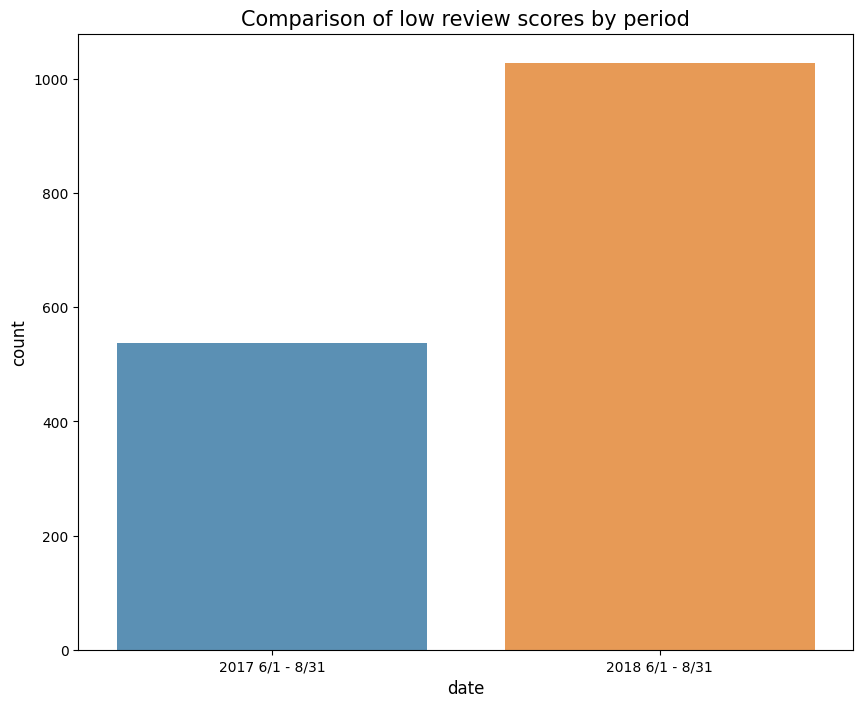

In [51]:

plt.figure(figsize = (10,8))
sns.barplot(y = delmiss['count'], x = delmiss['Date'], alpha = 0.8)
plt.ylabel('count', fontsize = 12)
plt.xlabel('date', fontsize = 12)
plt.title('Comparison of low review scores by period', fontsize = 15)
plt.show()

In [52]:
review222 = review2.review_comment_message.dropna(axis = 0)
review222

16       GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...
128                           Demorou de mais pra entrega 
262      Foi marcado o dia 14/02 para entrega do pedido...
263      LOJA ALÉM DO FRETE SER MUITO CARO . O PRODUTO ...
336      A capa protetora não é exatamente o que eu esp...
                               ...                        
99062           Produto ainda não chegou, estou no aguardo
99117    Eu recebi o produto no prazo porém já veio lig...
99139    nao satifez minhas expectativas, não funciona ...
99200    Foto muito diferente principalmente a graninha...
99203    Tive um problema na entrega em que o correio c...
Name: review_comment_message, Length: 2145, dtype: object

In [53]:
social.mean()


<ipython-input-53-cb5c6c269754>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  social.mean()


has_company                            NaN
has_gtin                               NaN
average_stock                          NaN
declared_product_catalog_size          NaN
declared_monthly_revenue          0.000000
order_item_id                     1.153153
price                            97.923401
freight_value                    17.760090
review_score                      4.202703
dtype: float64

In [54]:
organicsearch.mean()


<ipython-input-54-6fd2469dda4c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  organicsearch.mean()


has_company                        1.000000
has_gtin                           1.000000
declared_product_catalog_size           NaN
declared_monthly_revenue           0.000000
order_item_id                      1.182226
price                            154.302435
freight_value                     21.475579
review_score                       4.332338
dtype: float64

In [55]:
organicsearch['has_company']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5005    NaN
5006    NaN
5007    NaN
5019    NaN
5020    NaN
Name: has_company, Length: 1339, dtype: object

In [56]:
organicsearch[organicsearch['has_company'] == 'NaN']

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [57]:
paidsearch.mean()

<ipython-input-57-e97b036ca481>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  paidsearch.mean()


has_company                        0.038462
has_gtin                           0.961538
declared_product_catalog_size           NaN
declared_monthly_revenue           0.000000
order_item_id                      1.205679
price                            107.355956
freight_value                     18.475762
review_score                       4.254155
dtype: float64

In [58]:
mktlead.origin.value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

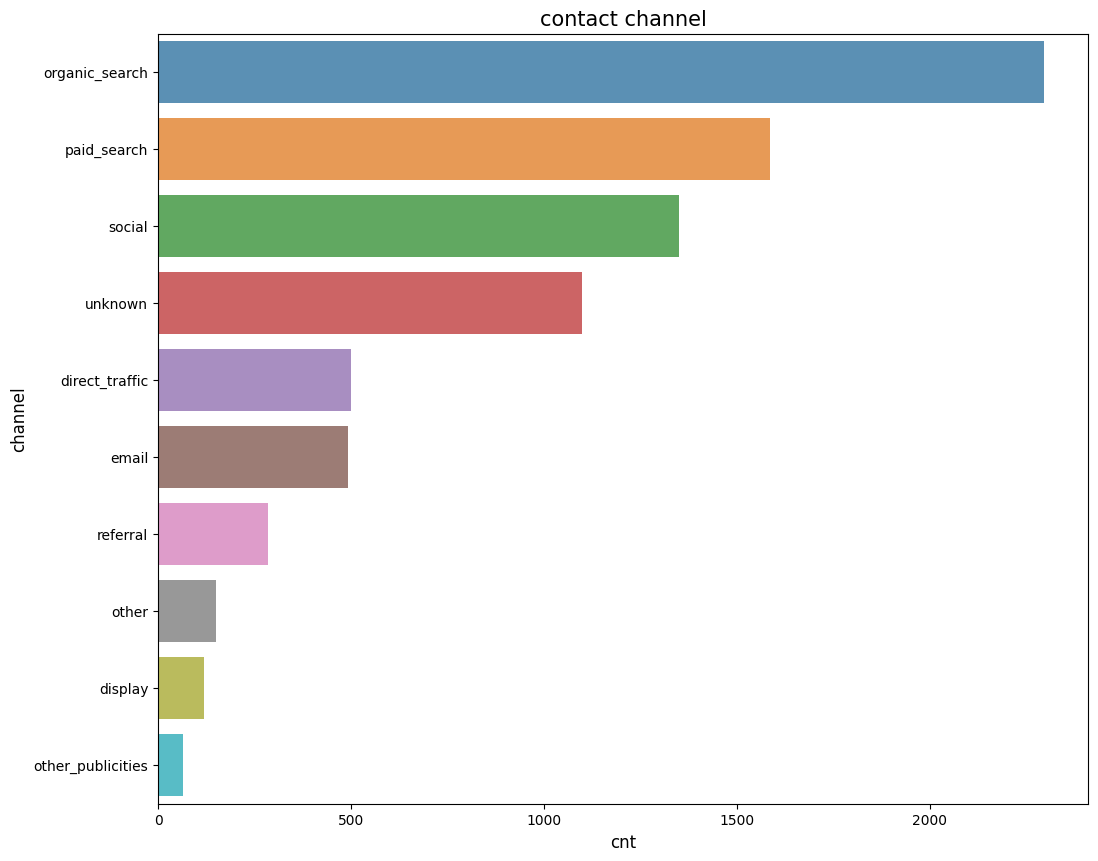

In [59]:
ori = mktlead.origin.value_counts() 
plt.figure(figsize = (12,10))
sns.barplot(y = ori.index, x = ori.values, alpha = 0.8)
plt.ylabel('channel', fontsize = 12)
plt.xlabel('cnt', fontsize = 12)
plt.title('contact channel', fontsize = 15)
plt.show()

In [60]:
customers.customer_city.value_counts().head(20)

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
Name: customer_city, dtype: int64

In [61]:
reviewpie1 = pd.DataFrame({'category' : ['delivery', 'product', 'others'],
                             'rate' : [5145/8745, 1556/8745, 2044/8745]})
reviewpie1

,category,rate
0,delivery,0.588336
1,product,0.177930
2,others,0.233734


In [62]:
reviewpie2 = pd.DataFrame({'category' : ['delivery', 'product', 'others'],
                             'rate' : [1095/2145, 449/2145, 601/2145]})
reviewpie2

,category,rate
0,delivery,0.510490
1,product,0.209324
2,others,0.280186


In [63]:
total = pd.DataFrame({'category' : ['delivery', 'product', 'others'],
                             'rate' : [6240/10890, 2005/10890, 2645/10890]})
total

,category,rate
0,delivery,0.573003
1,product,0.184114
2,others,0.242883


In [64]:
reviewpie1.to_csv('re1.csv')

In [65]:
reviewpie2.to_csv('re2.csv')

In [66]:
total.to_csv('total1.csv')

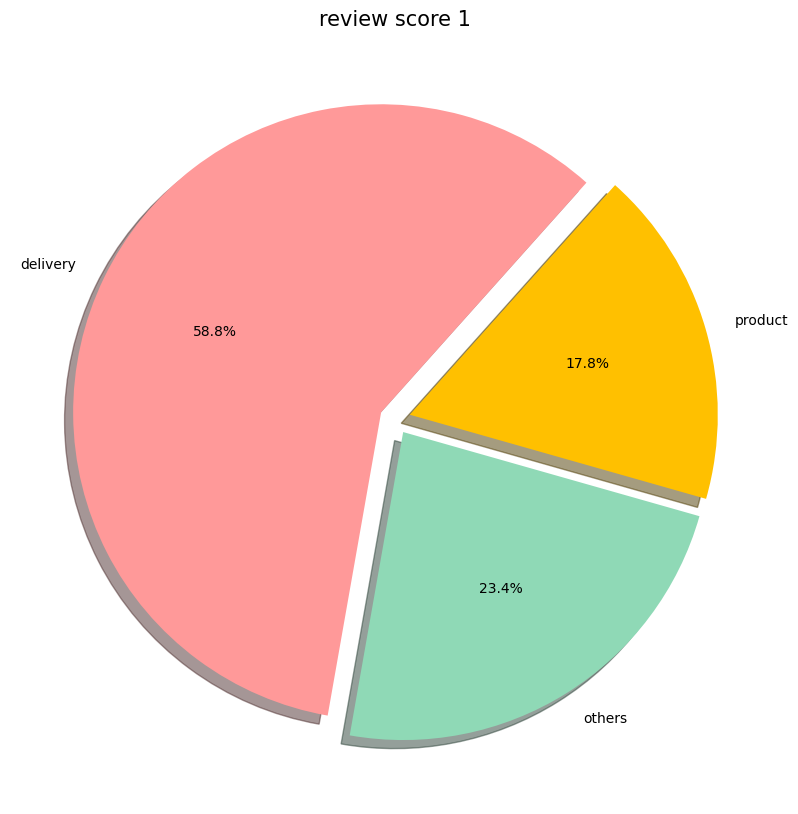

In [67]:
ratio = [5145/8745, 1556/8745, 2044/8745]
labels = ['delivery', 'product', 'others']
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']

plt.figure(figsize = (12,10))
plt.title('review score 1', fontsize = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

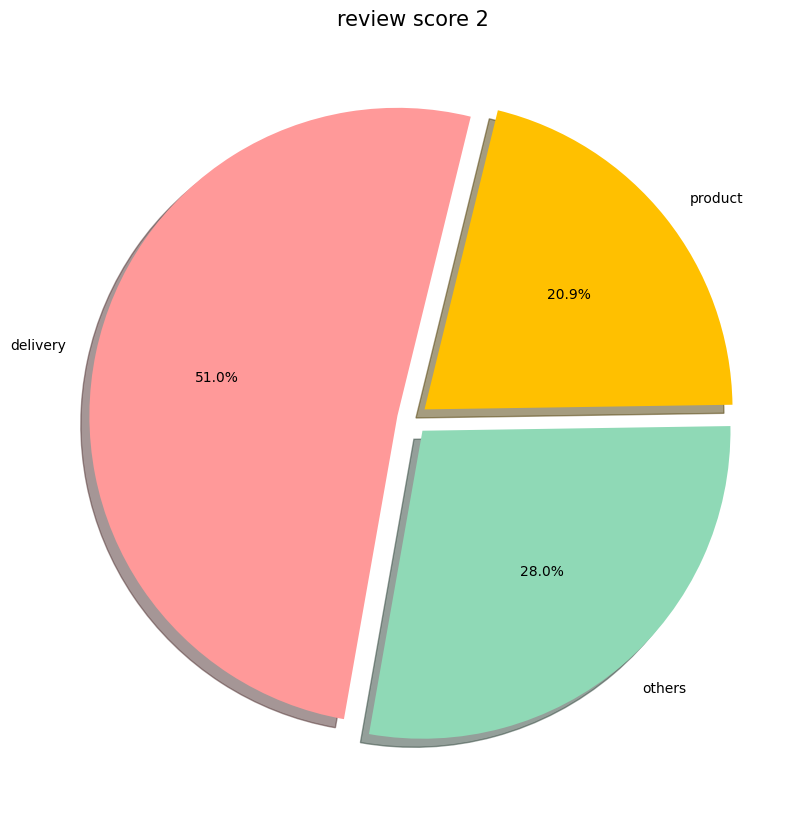

In [68]:
ratio = [1095/2145, 449/2145, 601/2145]
labels = ['delivery', 'product', 'others']
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']

plt.figure(figsize = (12,10))
plt.title('review score 2', fontsize = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

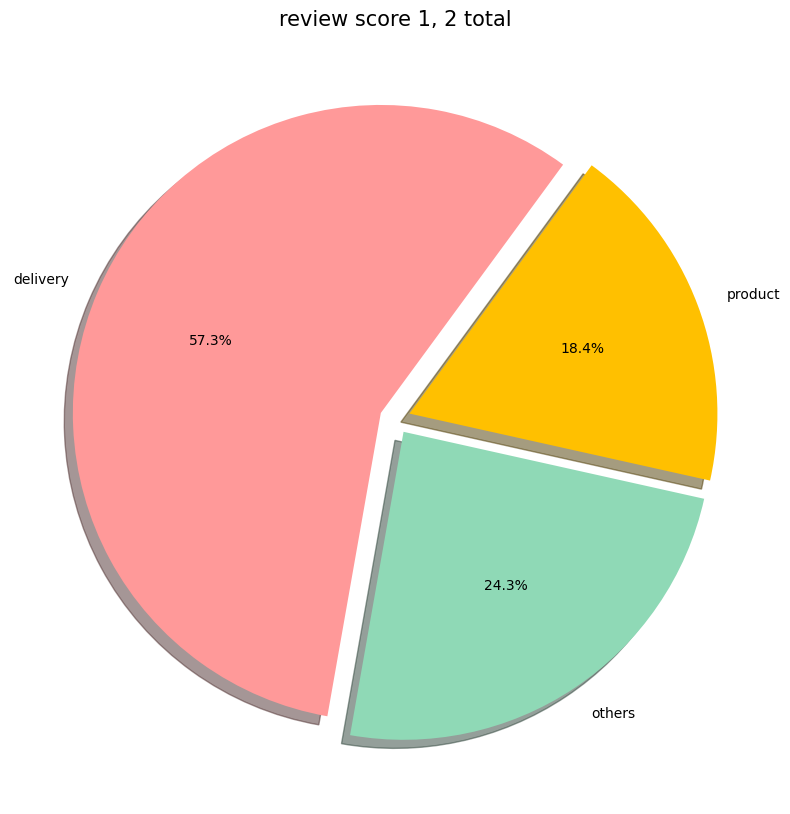

In [69]:
ratio = [6240/10890, 2005/10890, 2645/10890]
labels = ['delivery', 'product', 'others']
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']

plt.figure(figsize = (12,10))
plt.title('review score 1, 2 total', fontsize = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [70]:
ordercount = pd.merge(orderitem, orderreview, on = 'order_id')
ordercount

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [71]:
order11 = pd.merge(orders, orderreview, on = 'order_id')
order11

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99220,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99221,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99222,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [72]:
orreview1 = order11[order11['review_score'] == 1]
orreview2 = order11[order11['review_score'] == 2]

In [73]:
purre117 = orreview1[orreview1['review_creation_date'].between('2017-06-01 00:00:00', '2017-08-31 00:00:00')]
purre117

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
76,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-09 18:45:18,2017-08-10 20:21:53,2017-08-16 18:17:54,2017-08-31 00:00:00,7b66de927426b71a817aa36df5e8a0b3,1,NaN,Muito bom o produto e preço cobrado!,2017-08-17 00:00:00,2017-08-17 23:36:23
160,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00,a205cb50c298eea221ae32dc498db2c3,1,NaN,NaN,2017-06-14 00:00:00,2017-06-16 12:13:47
320,16c24987724018f73b746aacfbb5f8e8,ffdc2af7160aed3bad21cbc8ec68c0c5,delivered,2017-05-20 02:48:00,2017-05-23 03:50:25,2017-06-05 13:58:19,2017-06-16 16:52:02,2017-06-09 00:00:00,fb7793b81898e28816f37c40bef6c9f8,1,NaN,NaN,2017-06-14 00:00:00,2017-06-14 10:56:09
367,db5fdbee9ab29d55f24c329246e6fe51,3487bedbddf4797d7308d0aa43dcf30b,delivered,2017-06-17 13:16:44,2017-06-17 13:25:13,2017-06-19 12:49:33,2017-06-26 15:58:13,2017-07-11 00:00:00,e8160c6e61a39e8df70be847c5986888,1,NaN,"Me entregaram faltando um pote, insatisfação",2017-06-27 00:00:00,2017-06-30 19:45:36
384,4f7e398a1ddb1c349465b42b6865c60b,364fbe9334877bc7ca3da92913b2cdbf,delivered,2017-06-02 14:00:19,2017-06-02 14:42:50,2017-06-07 12:37:32,2017-06-12 17:38:13,2017-07-05 00:00:00,128c507602eef71e8e4ccc5206707507,1,NaN,N gostei do produto n era oq imaginei nem oq e...,2017-06-13 00:00:00,2017-06-14 10:15:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,a6a3f8407b163d20163f6ea1e0a6d9f4,3b06162facd818071784c995d0b4bb09,delivered,2017-06-25 11:24:35,2017-06-25 11:35:16,2017-06-29 15:36:10,2017-07-15 16:36:37,2017-07-26 00:00:00,e69b3d95b4100e9d27e153b2253b490a,1,NaN,"Comorei como 4 litros, mas a capacidade real é...",2017-07-16 00:00:00,2017-07-17 11:02:00
98466,b0c8315fab353a75ddea26c39507353d,5bde64bcacb187185e1fc17b685ebfae,delivered,2017-06-07 21:58:07,2017-06-07 22:05:13,2017-06-13 13:30:25,2017-07-12 17:23:49,2017-07-06 00:00:00,073c4bbf123b04df2adc2a88824a0ea8,1,NaN,Não recebi o produto,2017-07-08 00:00:00,2017-07-10 21:12:22
98791,f1fbfebcfeaeedc9470bfb15f569dbea,a8d7d756a888b0382a2d3881b870a1ae,delivered,2017-06-07 20:21:54,2017-06-07 20:30:20,2017-06-09 16:35:56,2017-06-16 15:42:03,2017-06-28 00:00:00,9d00b8fa555d61217ade36892c86ed97,1,NaN,"Comprei um toner, mas, não funciona. Exijo que...",2017-06-17 00:00:00,2017-06-18 21:18:52
98799,3003eed153ba33c08d9352250d65ba75,e16cf97d3d5183b6516d4fa8a476285c,delivered,2017-06-19 21:27:05,2017-06-19 21:35:23,2017-06-22 13:06:51,2017-07-03 14:07:31,2017-07-19 00:00:00,3a3c8a7cefc90bf9b10ac53451f4549e,1,NaN,"O produto que eu comprei veio errado, comprei ...",2017-07-04 00:00:00,2017-07-05 09:46:50


In [74]:
purre118 = orreview1[orreview1['review_creation_date'].between('2018-06-01 00:00:00', '2018-08-31 00:00:00')]
purre118

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2d4303fd561eb4ab51c87faa6598dc10,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17 00:00:00,2018-06-20 11:38:22
43,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,5853e27c64b89e222c5e4edf78bec3d4,1,NaN,NaN,2018-07-01 00:00:00,2018-07-11 20:41:18
51,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,2018-07-26 14:55:10,2018-07-27 12:04:00,2018-07-31 22:26:55,2018-08-16 00:00:00,25b502beeef8b3aff87449ccdc001f53,1,Recebi apenas 1 unidade,"Recebi apenas 1 unidade solicitada, deveriam s...",2018-08-01 00:00:00,2018-08-04 02:14:45
140,f4471dae8c482f51aa1826cd9f5d4433,167b9485947ed0a354a3f8dad04eb199,delivered,2018-07-05 18:40:47,2018-07-05 18:55:15,2018-07-10 15:10:00,2018-07-11 21:16:47,2018-07-19 00:00:00,f58ffe05a2a9a1f382fa553857768580,1,Péssima compra,Recebi um produto velho,2018-07-12 00:00:00,2018-07-13 04:54:36
213,615ae1b88a25a4ac47fbf55c9c847b6e,25daddfce277eafad87c4d28d71d8229,delivered,2018-08-10 13:42:06,2018-08-10 13:55:18,2018-08-13 10:37:00,2018-08-20 23:38:44,2018-08-30 00:00:00,3eacad17243a8f2b31dbd153b04b7c35,1,NaN,Comprei um lençol queen mas as fronhas não ves...,2018-08-21 00:00:00,2018-08-22 03:12:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99077,2a0c9271a9b5e2f5932bdcc2a0b89200,89e4a2b4ea9a68c1fae1411107ed0bfa,delivered,2018-06-11 10:31:39,2018-06-11 10:58:43,2018-06-12 14:06:00,2018-06-14 19:54:46,2018-06-21 00:00:00,65fccf4e7427ed688e24d54921e86287,1,Produto Errado,Comprei o Kit e a película que veio é para o I...,2018-06-15 00:00:00,2018-06-16 23:27:32
99079,87d30b7fd5316c576377b79548be7d84,f6707ad9321dba0eba6285da8c77b7e4,delivered,2018-07-05 21:48:56,2018-07-06 21:50:32,2018-07-10 12:06:00,2018-07-11 15:58:49,2018-07-18 00:00:00,f1f97561f0b60f4c2fa3ba934b006f73,1,insatisfeito com a loja,comprei o modelo da foto (modelo EP 760/1) e r...,2018-07-14 00:00:00,2018-07-15 21:22:26
99087,ea9215d79709bb4917f0d0976eb91d17,5bd7d2276e288fc3b5567b6aecf35504,delivered,2018-05-22 11:15:53,2018-05-22 11:37:34,2018-05-29 07:15:00,2018-06-06 20:11:20,2018-06-19 00:00:00,d2666173a07103ca603da0f1aaf15955,1,Não recomendo!!!,Comprei um cartão Micro SD XC I Classe 10 e re...,2018-06-07 00:00:00,2018-06-08 23:48:54
99097,3c042ee4b8b597c3d265a93a21bbf99f,d71a0d0cf6bbacec526203263382501b,delivered,2018-06-23 18:22:41,2018-06-23 18:35:32,2018-06-25 14:10:00,2018-07-04 16:07:32,2018-07-26 00:00:00,4ed6a83a1c64b54be8e93267e1995004,1,NaN,"Eu tive que retirar no correio, sendo que pagu...",2018-07-05 00:00:00,2018-07-05 22:31:03


In [75]:
purre217 = orreview2[orreview2['review_creation_date'].between('2017-06-01 00:00:00', '2017-08-31 00:00:00')]
purre217

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
29,f70a0aff17df5a6cdd9a7196128bd354,456dc10730fbdba34615447ea195d643,delivered,2017-08-10 11:58:33,2017-08-12 02:45:24,2017-08-17 15:35:07,2017-08-18 14:28:02,2017-08-23 00:00:00,2f111691fc93df88fc3aa8c2deac61ce,2,NaN,O produto veio faltando a base para auto e com...,2017-08-19 00:00:00,2017-08-19 23:46:02
107,e1da8361c76cab67aa3588a1fbf1af54,dd854e24b40e3bc2b306946dee252015,delivered,2017-07-01 15:42:32,2017-07-04 04:10:19,2017-07-04 14:52:46,2017-07-12 20:17:57,2017-07-25 00:00:00,2d3b1802459909a151868085605311ab,2,NaN,NaN,2017-07-13 00:00:00,2017-07-14 00:23:29
954,af42887f85d980291a066176c4d13709,8f0b436a1be5cd29776f9ddb3bef133a,delivered,2017-06-18 19:51:54,2017-06-20 10:35:28,2017-06-27 16:37:54,2017-07-04 14:41:48,2017-07-11 00:00:00,6bccb495126cf04a3464e3b33de2990e,2,NaN,Produto foi entregue com muita demora\r\n,2017-07-05 00:00:00,2017-07-06 00:59:21
1009,044d94a4ac73b24fe28ff5293ac35bd8,482d1baa7d2f9c4d4b54ae09215d39c8,delivered,2017-06-19 14:56:36,2017-06-20 14:50:17,2017-06-21 08:11:54,2017-06-26 08:23:37,2017-07-19 00:00:00,96813c044224f5c1ea4226e2083b1f9a,2,NaN,recebi 2 dos 3 produtos desejados,2017-06-27 00:00:00,2017-06-29 13:36:26
2058,793b7a8a6150d038052487e8a2af52ec,d57230d9d905c3efa3f8d07284c69167,delivered,2017-06-22 18:32:32,2017-06-22 18:42:44,2017-06-29 12:38:02,2017-07-07 18:03:06,2017-07-14 00:00:00,53de55a9b8bac8dd6179d5ca417533cc,2,NaN,Boa noite. ... quando fiz o pedido era um kit ...,2017-07-08 00:00:00,2017-07-11 01:23:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97108,ffed7e90414c1477a6b92554661d465f,b7a530c512ca7de885521441884f4ef5,delivered,2017-07-31 14:44:31,2017-07-31 14:55:20,2017-08-03 17:27:39,2017-08-14 15:52:37,2017-08-22 00:00:00,e1c7f56bd61e4f0b284f66bf600dd64e,2,NaN,NaN,2017-08-15 00:00:00,2017-08-15 20:51:08
97369,11978d520d85578c9f024b99ac1a87ef,4304f16b63cae276cb72b52baeb978cf,delivered,2017-08-07 19:36:19,2017-08-07 20:25:19,2017-08-10 15:57:31,2017-08-16 21:10:07,2017-08-29 00:00:00,a28a06c28497c38c8670c1a95e58f3bd,2,NaN,"o produto falha muito, cai direto e as vezes n...",2017-08-17 00:00:00,2017-08-18 03:57:22
98166,f9697e263e9eec082f1ced4fa81d2faa,b4b0ce0c3cfac1b0d240823681496307,delivered,2017-07-24 09:26:03,2017-07-25 03:45:33,2017-07-25 22:47:32,2017-07-31 20:37:39,2017-08-17 00:00:00,504a0ced013aff6820f66f7fe37d2946,2,NaN,NaN,2017-08-01 00:00:00,2017-08-04 11:46:49
98685,0115f8bb1dc16d3fac863ce1deb037b6,17ec3674dce86b3240e0a333cc51112e,delivered,2017-06-30 19:13:15,2017-06-30 19:25:18,2017-07-03 11:59:40,2017-07-07 17:12:36,2017-07-21 00:00:00,14b13dae5b13a5e64aa90f29a72def7f,2,NaN,NaN,2017-07-08 00:00:00,2017-07-09 02:20:19


In [76]:
purre218 = orreview2[orreview2['review_creation_date'].between('2018-06-01 00:00:00', '2018-08-31 00:00:00')]
purre218

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
188,b6b3633f97c686d8e188ac6fa29ff20d,8d3d362741da05c706eb55001bdfa1b9,delivered,2018-07-27 12:45:51,2018-07-27 13:04:20,2018-08-02 13:33:00,2018-08-06 17:20:53,2018-08-17 00:00:00,ec15150c84cb391fa334a4f9b333c35e,2,boa,NaN,2018-08-07 00:00:00,2018-08-07 20:37:18
281,c4d2f075fc3bf3a06d1e68e113c35cbd,aa6edca5d83d4c8e9a2262b9847febd6,delivered,2018-08-01 14:58:41,2018-08-01 15:31:17,2018-08-02 16:46:00,2018-08-15 00:18:53,2018-08-27 00:00:00,199230aa533406b9564ad1ce09fe0f4c,2,Não é a melhor marca,tenho outro sling de outra marca com tecido mu...,2018-08-16 00:00:00,2018-08-21 14:08:44
461,e54613f3313c396f77d8280b9121ea2e,fdb50c069d85c482f1ecfde317595741,delivered,2018-06-15 21:45:12,2018-06-15 22:20:30,2018-06-19 14:46:00,2018-07-02 17:19:07,2018-07-17 00:00:00,f7d0ddce17de75748769092645214bb4,2,NaN,NaN,2018-07-03 00:00:00,2018-07-04 13:16:43
474,dcb4a1d21593a108db61f12a4b3d61db,2ed973ea37080a94b7beaef7458b2e15,delivered,2018-06-19 13:22:15,2018-06-19 13:57:28,2018-06-20 14:15:00,2018-06-25 13:11:20,2018-07-19 00:00:00,97e128c1f6c5237e418f577aea822340,2,PRODUTO COM MEDIDA INCORR,"Produto chegou no prazo,porem, nao veio na med...",2018-06-26 00:00:00,2018-06-26 20:57:44
869,5f071a8534fb6805fa6ec902f04219e4,a13d2d3b615e7782205484d9c603cbe7,delivered,2018-08-20 20:28:26,2018-08-20 20:50:06,2018-08-21 12:03:00,2018-08-25 19:04:45,2018-09-17 00:00:00,96a20cec700f8a78916f337c0dc591a6,2,Nao era o que eu esperava,"Comprei o relógio todo preto, com fecho preto,...",2018-08-26 00:00:00,2018-08-27 02:58:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98157,874a7690bc049bd4ce210d195bdfff7b,f6b2c83ea477af36f44a1e2df7320036,delivered,2018-08-02 12:06:47,2018-08-02 13:05:56,2018-08-10 14:42:00,2018-08-13 15:50:48,2018-08-08 00:00:00,1c0d3df33c08ae4efe4ec8977554ff70,2,NaN,NaN,2018-08-10 00:00:00,2018-08-10 09:29:21
98158,f5e2da86d5da6b3c66ec9f76a8c91bb3,2bcc94fcfc3496453107b83bcf7f277a,delivered,2018-06-24 11:41:01,2018-06-24 11:58:12,2018-06-25 15:25:00,2018-06-27 16:22:21,2018-07-24 00:00:00,1390d86a9bf2cb9f1b5e9fecb290ad45,2,Tamanho,"Faltou tamanho na descrição, acho q veio falta...",2018-06-28 00:00:00,2018-06-28 19:57:23
98691,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00,68c3385b4bb41af5847346c3552ba744,2,Troca de produto.,Preciso trocar os copos pois vieram errados. O...,2018-08-04 00:00:00,2018-08-04 13:57:25
99039,5d9b03cb14fe4fbb8f4e9f3de26048f2,2eaf94a9ba1341b238ce32c43a9a848c,delivered,2018-06-22 15:11:49,2018-06-22 15:38:22,2018-06-25 13:45:00,2018-06-28 17:58:30,2018-07-05 00:00:00,b8f39c46b0b2a5019d439c5bce63b5b8,2,8,"Esse produto veio certo ,mas já fiz compra ant...",2018-06-29 00:00:00,2018-06-29 21:47:28


주문량
17년도 11475 18902
18년도 18902
주문량 65% 증가

18년도 2498
17년도 1397
부정 리뷰 79% 증가

In [77]:
ordertime17 = order11[order11['order_purchase_timestamp'].between('2017-06-01 00:00:00', '2017-08-31 00:00:00')]
ordertime17

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,89b738e70a1ce346db29a20fb2910161,4,NaN,NaN,2017-07-27 00:00:00,2017-07-27 22:48:30
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,abc5655186d40772bd6e410420e6a3ed,5,NaN,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32
11,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,a932e1fddc0c17fc26de56687b48f922,4,NaN,NaN,2017-07-20 00:00:00,2017-07-22 20:11:54
29,f70a0aff17df5a6cdd9a7196128bd354,456dc10730fbdba34615447ea195d643,delivered,2017-08-10 11:58:33,2017-08-12 02:45:24,2017-08-17 15:35:07,2017-08-18 14:28:02,2017-08-23 00:00:00,2f111691fc93df88fc3aa8c2deac61ce,2,NaN,O produto veio faltando a base para auto e com...,2017-08-19 00:00:00,2017-08-19 23:46:02
36,5acce57f8d9dfd55fa48e212a641a69d,295ae9b35379e077273387ff64354b6f,delivered,2017-07-31 21:37:10,2017-08-02 02:56:02,2017-08-03 18:32:48,2017-08-08 21:24:41,2017-08-22 00:00:00,d0d8cc7219984cfa3763c891edb27b0b,5,NaN,NaN,2017-08-09 00:00:00,2017-08-10 14:50:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,226dda5620db063cd962833766480273,b3e43e654b4d35baf3840feca1135f85,delivered,2017-07-18 12:42:28,2017-07-18 12:55:16,2017-07-19 16:44:48,2017-07-28 18:55:50,2017-08-11 00:00:00,ffb182643040b0513d85c9729c3a97da,4,NaN,O produto foi entregue antes do prazo. E aprov...,2017-07-29 00:00:00,2017-07-30 03:02:02
99197,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,f5453b3d33358ed459eb4312392b96a8,4,NaN,NaN,2017-08-24 00:00:00,2017-08-25 11:38:19
99203,f9e3402be5a5ea63344347582ca9f45f,6f2cf56878f7f82151b0ad02590192c0,delivered,2017-06-07 11:02:37,2017-06-08 02:45:24,2017-06-08 14:03:29,2017-06-19 19:19:30,2017-07-05 00:00:00,e149dcf1404ee48d59a405c347347b9a,5,NaN,NaN,2017-06-21 00:00:00,2017-06-24 13:53:53
99204,6f46d42016226f77893ed3978d6903d0,3803547f820b1e10b7ad9c7985f06753,delivered,2017-07-05 15:55:19,2017-07-05 17:43:48,2017-07-07 19:48:40,2017-07-19 22:10:03,2017-08-14 00:00:00,a2d18b7c1997735ca5196ea804192574,5,NaN,tudo bom e ótimo,2017-07-20 00:00:00,2017-07-21 14:00:14


In [78]:
ordertime18 = order11[order11['order_purchase_timestamp'].between('2018-06-01 00:00:00', '2018-08-31 00:00:00')]
ordertime18

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,ed220e853e96b629118a3576e02900b6,5,NaN,NaN,2018-06-20 00:00:00,2018-06-20 15:31:29
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,346e42116863ea64d51cef464d8f0c9c,5,NaN,NaN,2018-07-31 00:00:00,2018-08-02 21:15:12
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,5a8608437f4b52bec5cd143f37258b5e,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99188,27b6badcdaa36a93808ac126acc05329,dfbad75de7638cec2c9482cac4a10828,delivered,2018-06-27 09:56:34,2018-06-27 11:06:41,2018-06-27 11:42:00,2018-06-28 18:04:13,2018-07-12 00:00:00,5beb7b85c560bfd37c11045bd13f76c6,5,NaN,NaN,2018-06-29 00:00:00,2018-06-30 13:41:35
99190,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28 00:00:00,320dd0304bb00e9c1e423e09c9811377,5,NaN,NaN,2018-08-28 00:00:00,2018-08-29 13:03:42
99194,4a69678ecf74bfd34260031c04329b68,eb19f77ffd29917f353d12152b0c0de1,delivered,2018-07-22 16:58:38,2018-07-23 12:32:05,2018-07-23 15:12:00,2018-07-24 22:46:38,2018-07-31 00:00:00,3e841437b5535350ae1de33718c9e77a,5,NaN,NaN,2018-07-25 00:00:00,2018-07-26 10:33:47
99199,c627fe35fce1a754bc5b812d0b8ff379,42b0671b440d1f2527bddd8b723e0a0c,delivered,2018-06-03 18:44:31,2018-06-03 18:55:15,2018-06-04 13:48:00,2018-06-07 13:22:19,2018-07-11 00:00:00,678e845cfbc4e32ca459a07b35c4bf33,5,NaN,NaN,2018-06-08 00:00:00,2018-06-10 17:18:36


In [79]:
orderapp17 = order11[order11['order_approved_at'].between('2017-06-01 00:00:00', '2017-08-31 00:00:00')]
orderapp17

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,89b738e70a1ce346db29a20fb2910161,4,NaN,NaN,2017-07-27 00:00:00,2017-07-27 22:48:30
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,abc5655186d40772bd6e410420e6a3ed,5,NaN,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32
11,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,a932e1fddc0c17fc26de56687b48f922,4,NaN,NaN,2017-07-20 00:00:00,2017-07-22 20:11:54
29,f70a0aff17df5a6cdd9a7196128bd354,456dc10730fbdba34615447ea195d643,delivered,2017-08-10 11:58:33,2017-08-12 02:45:24,2017-08-17 15:35:07,2017-08-18 14:28:02,2017-08-23 00:00:00,2f111691fc93df88fc3aa8c2deac61ce,2,NaN,O produto veio faltando a base para auto e com...,2017-08-19 00:00:00,2017-08-19 23:46:02
36,5acce57f8d9dfd55fa48e212a641a69d,295ae9b35379e077273387ff64354b6f,delivered,2017-07-31 21:37:10,2017-08-02 02:56:02,2017-08-03 18:32:48,2017-08-08 21:24:41,2017-08-22 00:00:00,d0d8cc7219984cfa3763c891edb27b0b,5,NaN,NaN,2017-08-09 00:00:00,2017-08-10 14:50:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,226dda5620db063cd962833766480273,b3e43e654b4d35baf3840feca1135f85,delivered,2017-07-18 12:42:28,2017-07-18 12:55:16,2017-07-19 16:44:48,2017-07-28 18:55:50,2017-08-11 00:00:00,ffb182643040b0513d85c9729c3a97da,4,NaN,O produto foi entregue antes do prazo. E aprov...,2017-07-29 00:00:00,2017-07-30 03:02:02
99197,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,f5453b3d33358ed459eb4312392b96a8,4,NaN,NaN,2017-08-24 00:00:00,2017-08-25 11:38:19
99203,f9e3402be5a5ea63344347582ca9f45f,6f2cf56878f7f82151b0ad02590192c0,delivered,2017-06-07 11:02:37,2017-06-08 02:45:24,2017-06-08 14:03:29,2017-06-19 19:19:30,2017-07-05 00:00:00,e149dcf1404ee48d59a405c347347b9a,5,NaN,NaN,2017-06-21 00:00:00,2017-06-24 13:53:53
99204,6f46d42016226f77893ed3978d6903d0,3803547f820b1e10b7ad9c7985f06753,delivered,2017-07-05 15:55:19,2017-07-05 17:43:48,2017-07-07 19:48:40,2017-07-19 22:10:03,2017-08-14 00:00:00,a2d18b7c1997735ca5196ea804192574,5,NaN,tudo bom e ótimo,2017-07-20 00:00:00,2017-07-21 14:00:14


In [80]:
orderapp18 = order11[order11['order_approved_at'].between('2018-06-01 00:00:00', '2018-08-31 00:00:00')]
orderapp18

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,ed220e853e96b629118a3576e02900b6,5,NaN,NaN,2018-06-20 00:00:00,2018-06-20 15:31:29
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,346e42116863ea64d51cef464d8f0c9c,5,NaN,NaN,2018-07-31 00:00:00,2018-08-02 21:15:12
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,5a8608437f4b52bec5cd143f37258b5e,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99188,27b6badcdaa36a93808ac126acc05329,dfbad75de7638cec2c9482cac4a10828,delivered,2018-06-27 09:56:34,2018-06-27 11:06:41,2018-06-27 11:42:00,2018-06-28 18:04:13,2018-07-12 00:00:00,5beb7b85c560bfd37c11045bd13f76c6,5,NaN,NaN,2018-06-29 00:00:00,2018-06-30 13:41:35
99190,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28 00:00:00,320dd0304bb00e9c1e423e09c9811377,5,NaN,NaN,2018-08-28 00:00:00,2018-08-29 13:03:42
99194,4a69678ecf74bfd34260031c04329b68,eb19f77ffd29917f353d12152b0c0de1,delivered,2018-07-22 16:58:38,2018-07-23 12:32:05,2018-07-23 15:12:00,2018-07-24 22:46:38,2018-07-31 00:00:00,3e841437b5535350ae1de33718c9e77a,5,NaN,NaN,2018-07-25 00:00:00,2018-07-26 10:33:47
99199,c627fe35fce1a754bc5b812d0b8ff379,42b0671b440d1f2527bddd8b723e0a0c,delivered,2018-06-03 18:44:31,2018-06-03 18:55:15,2018-06-04 13:48:00,2018-06-07 13:22:19,2018-07-11 00:00:00,678e845cfbc4e32ca459a07b35c4bf33,5,NaN,NaN,2018-06-08 00:00:00,2018-06-10 17:18:36


In [81]:
purcnt = pd.DataFrame({'Date' : ['2017 6/1 - 8/31' , '2018 6/1 - 8/31'],
                             'order count' : [11475, 18902],
                             'review count' : [1397, 2498]})
purcnt

,Date,order count,review count
0,2017 6/1 - 8/31,11475,1397
1,2018 6/1 - 8/31,18902,2498


In [82]:
purcnt.to_csv('cnt.csv')

In [83]:
plt.figure(figsize = (10,8))
sns.barplot(y = purcnt['count'], x = purcnt['Date'], alpha = 0.8)
plt.ylabel('count', fontsize = 12)
plt.xlabel('date', fontsize = 12)
plt.title('Comparison of number of orders by period', fontsize = 15)
plt.show()

KeyError: ignored

<Figure size 1000x800 with 0 Axes>

In [ ]:
dict_data = {'Low review score':[537, 1028],
             'Number of orders':[11475, 18902]}

df_com = pd.DataFrame(dict_data, 
            index=['2017 6/1 - 8/31' , '2018 6/1 - 8/31'])

print(df_com)

df_com.plot(kind='line', figsize=(20, 5))
plt.title('comparison data')
plt.ylabel('data')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import wordcloud
from PIL import Image
import matplotlib.pyplot as plt



In [ ]:
tfidf = TfidfVectorizer() # stop_words='english'
tfidf_matrix = tfidf.fit_transform(revi['review_comment_message_en']).values.astype(str)
tfidf_matrix

In [ ]:
wc = revi.set_index()